In [ ]:
# Copyright 2025 Davies Obiekea
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.



import pandas as pd

# Base directory for all files
path_base = '/Users/aplle/Desktop/UNILEVER CUMM SOV DEC/COMPETITIVE WATCHDOG/'

# Load individual files
df_synth_2020 = pd.read_excel(f'{path_base}watchdog_synthetic_2020.xlsx')  # Jan–Nov
df_2020_dec   = pd.read_excel(f'{path_base}Watchdog_2020_imputed.xlsx')    # Dec
df_2021       = pd.read_excel(f'{path_base}Watchdog_2021_imputed.xlsx')
df_2022       = pd.read_excel(f'{path_base}watchdog_synthetic_2022.xlsx')
df_2023       = pd.read_excel(f'/Users/aplle/Desktop/UNILEVER CUMM SOV DEC/COMPETITIVE WATCHDOG/Watchdog_2023/data/watchdog_2023_dataset.xlsx')
df_2024       = pd.read_excel(f'{path_base}watchdog_synthetic_2024.xlsx')

# Combine to form full 2020
df_2020_full = pd.concat([df_synth_2020, df_2020_dec], ignore_index=True)

# Combine historical and synthetic datasets
df_historical = pd.concat([df_2020_full, df_2021, df_2023], ignore_index=True)
df_synthetic  = pd.concat([df_synth_2020, df_2022, df_2024], ignore_index=True)


# Concatenate all into a single full dataset
df_all = pd.concat([df_historical, df_synthetic], ignore_index=True)

# Ensure 'Date' is datetime
df_all['Date'] = pd.to_datetime(df_all['Date'])

# Confirm shape
print("Final Combined Dataset:")
print(f"Combined data shape: {df_all.shape}")

df_all.head(10)

Final Combined Dataset:
Combined data shape: (2730962, 28)


,Medium,Month,Advertiser,Brand,Location,Station,TimeBand,Broadcast Time,Programme,Date,...,Daypart,Product,Year,Category,Region,TRP,GRP,Main,CPRP,Frequency
0,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
1,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
2,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
3,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
4,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
5,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
6,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,07:36:37,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
7,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,06:39:41,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
8,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,07:36:37,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN
9,Radio,1,Unilever Nig,Close Up,Ibadan,32 FM Ibadan,NaN,07:03:33,ROS,2020-01-01,...,1 Morning Drive,Spot,2020,Oral Care,Lagos/SW,NaN,NaN,Radio,NaN,NaN


In [2]:
# Remove duplicates (if any)
df_all.drop_duplicates(inplace=True)

In [3]:
# Drop unnecessary columns
drop_cols = ['CPRP','Main','Frequency','Day','TimeBand']  # these are no longer needed
df_all.drop(columns=[c for c in drop_cols if c in df_all], inplace=True)

In [4]:
df_all.isnull().sum()

Medium                0
Month                 0
Advertiser            0
Brand                 0
Location              0
Station               0
Broadcast Time        0
Programme             0
Date                  0
Spot                  0
Duration              0
Spend                 7
Quarter               0
Title                 0
Language              0
Normalize 30s         0
Daypart               0
Product               0
Year                  0
Category              0
Region                0
TRP               85651
GRP               44848
dtype: int64

In [5]:
df_all.dtypes


Medium                    object
Month                     object
Advertiser                object
Brand                     object
Location                  object
Station                   object
Broadcast Time            object
Programme                 object
Date              datetime64[ns]
Spot                       int64
Duration                   int64
Spend                    float64
Quarter                   object
Title                     object
Language                  object
Normalize 30s            float64
Daypart                   object
Product                   object
Year                       int64
Category                  object
Region                    object
TRP                       object
GRP                       object
dtype: object

In [6]:
# Data Type Conversions

# Convert columns that are stored as objects but should be numeric.
# For instance, TRP and GRP are key performance metrics.
if 'TRP' in df_all.columns:
    df_all['TRP'] = pd.to_numeric(df_all['TRP'], errors='coerce')
if 'GRP' in df_all.columns:
    df_all['GRP'] = pd.to_numeric(df_all['GRP'], errors='coerce')

# Convert 'Spend' to numeric if not already.
if 'Spend' in df_all.columns:
    df_all['Spend'] = pd.to_numeric(df_all['Spend'], errors='coerce')

In [7]:
df_all.dtypes

Medium                    object
Month                     object
Advertiser                object
Brand                     object
Location                  object
Station                   object
Broadcast Time            object
Programme                 object
Date              datetime64[ns]
Spot                       int64
Duration                   int64
Spend                    float64
Quarter                   object
Title                     object
Language                  object
Normalize 30s            float64
Daypart                   object
Product                   object
Year                       int64
Category                  object
Region                    object
TRP                      float64
GRP                      float64
dtype: object

In [8]:
df_all.isnull().sum()

Medium                 0
Month                  0
Advertiser             0
Brand                  0
Location               0
Station                0
Broadcast Time         0
Programme              0
Date                   0
Spot                   0
Duration               0
Spend                  7
Quarter                0
Title                  0
Language               0
Normalize 30s          0
Daypart                0
Product                0
Year                   0
Category               0
Region                 0
TRP               298066
GRP               240790
dtype: int64

In [9]:
# Fill missing values in 'TRP' with its median
if 'TRP' in df_all.columns:
    # Calculate the median of 'TRP', ignoring NaN values
    trp_median = df_all['TRP'].median()
    # Fill NaN values with the median
    df_all['TRP'] = df_all['TRP'].fillna(trp_median)

# Fill missing values in 'GRP' with its median
if 'GRP' in df_all.columns:
    # Calculate the median of 'GRP', ignoring NaN values
    grp_median = df_all['GRP'].median()
    # Fill NaN values with the median
    df_all['GRP'] = df_all['GRP'].fillna(grp_median)


In [10]:
df_all.isnull().sum()

Medium            0
Month             0
Advertiser        0
Brand             0
Location          0
Station           0
Broadcast Time    0
Programme         0
Date              0
Spot              0
Duration          0
Spend             7
Quarter           0
Title             0
Language          0
Normalize 30s     0
Daypart           0
Product           0
Year              0
Category          0
Region            0
TRP               0
GRP               0
dtype: int64

In [11]:
# Further cleaning and formatting of text i.e removing extra, trailing white spaces and symbols
import re

# Helper function to clean and format text.
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Remove leading/trailing white spaces.
    text = text.strip()
    # Replace multiple spaces with a single space.
    text = re.sub(r'\s+', '', text)
    # Remove unwanted symbols: keep only alphanumeric characters and spaces.
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert text to lower case.
    text = text.lower()
    return text

# Process all object (string) columns in the DataFrame.
object_cols = df_all.select_dtypes(include=['object']).columns
for col in object_cols:
    df_all[col] = df_all[col].apply(clean_text)


# Display a snippet of the cleaned and formatted DataFrame.
print("---- Cleaned and Formatted Data Snippet ----")
df_all.head(5)


---- Cleaned and Formatted Data Snippet ----


,Medium,Month,Advertiser,Brand,Location,Station,Broadcast Time,Programme,Date,Spot,...,Title,Language,Normalize 30s,Daypart,Product,Year,Category,Region,TRP,GRP
0,radio,1,unilevernig,closeup,ibadan,32fmibadan,063941,ros,2020-01-01,1,...,closeupgetfree25gcompletefreshprotection,english,1.0,1morningdrive,spot,2020,oralcare,lagossw,0.001177,0.001014
3,radio,1,unilevernig,closeup,ibadan,32fmibadan,063941,ros,2020-01-01,1,...,closeupgetfree25gcompletefreshprotection,pidgin,1.0,1morningdrive,spot,2020,oralcare,lagossw,0.001177,0.001014
6,radio,1,unilevernig,closeup,ibadan,32fmibadan,073637,ros,2020-01-01,1,...,closeupgetfree25gcompletefreshprotection,pidgin,1.0,1morningdrive,spot,2020,oralcare,lagossw,0.001177,0.001014
8,radio,1,unilevernig,closeup,ibadan,32fmibadan,073637,ros,2020-01-01,1,...,closeupgetfree25gcompletefreshprotection,english,1.0,1morningdrive,spot,2020,oralcare,lagossw,0.001177,0.001014
9,radio,1,unilevernig,closeup,ibadan,32fmibadan,070333,ros,2020-01-01,1,...,closeupgetfree25gcompletefreshprotection,english,1.0,1morningdrive,spot,2020,oralcare,lagossw,0.001177,0.001014


In [12]:
df_all['Month'].value_counts()

Month
december     154025
november     112765
august       107770
october       99193
september     87918
8             84473
10            82349
9             72219
june          71535
july          71063
7             66963
11            66557
april         65194
6             61535
may           60065
5             53555
march         53429
4             53375
12            52607
february      50664
1             49807
3             48613
january       45478
2             44099
Name: count, dtype: int64

In [63]:
# Map month names → integers
month_map = {
    'january':   1, 'february':  2, 'march':     3, 'april':    4,
    'may':       5, 'june':      6, 'july':      7, 'august':   8,
    'september': 9, 'october':  10, 'november': 11, 'december':12
}

# Create numeric month, pulling from map or converting digits
def parse_month(x):
    if x in month_map:
        return month_map[x]
    # if it's digits (e.g. '8' or '10'), cast
    try:
        i = int(x)
        if 1 <= i <= 12:
            return i
    except:
        pass
    return pd.NA  # unparseable

# df_all['Month_num'] = df_all['Month'].apply(parse_month)

# create standardized month_name from month_num
df_all['Month_name'] = df_all['Month_num'].map({v: k for k, v in month_map.items()})

#  Drop the old Month and raw helper
# df_all.drop(columns=['Month'], inplace=True)

# Convert to Categorical and set ordered categories 1–12
df_all['Month_num'] = df_all['Month_num'].astype('category')
df_all['Month_num'] = df_all['Month_num'].cat.set_categories(
    list(range(1, 12)), ordered=True
)

# Quick check
print(df_all['Month_num'].value_counts().sort_index())
print(df_all['Month_name'].value_counts().sort_index())


Month_num
1      95285
2      94763
3     102042
4     118569
5     113620
6     133070
7     138026
8     192243
9     160137
10    181542
11    179322
Name: count, dtype: int64
Month_name
january       95285
february      94763
march        102042
april        118569
may          113620
june         133070
july         138026
august       192243
september    160137
october      181542
november     179322
Name: count, dtype: int64


In [14]:
df_all['Advertiser'].unique()

array(['unilevernig', 'unilevernigplc', 'tolaramgroup', 'pzcussons',
       'evansindustriesltd', 'twiningandcompany', 'reckittbenckiser',
       'patisen', 'proctergamblenigltd', 'reckittbenckizernigplc',
       'mrsischoconut', 'pzwilmar', 'sundryhouseholdgoods',
       'glaxosmithklinenigplc', 'beiersdorf', 'chinigerialtd',
       'proctergamble', 'colgatepalmolive', 'gbfoods', 'cadburynig',
       'zaron', 'luckyfibre', 'nestlenig', '7upbottlingcompany',
       'expandglobal', 'gbfoodsafricaholdco', 'promasidornig',
       'ghandourcosmectics', 'ekosupremeresources', 'strengthfromnature',
       'dangotegroup', 'aspiranig', 'nestlenigplc', 'carawayfoodsintl',
       'gsk', 'royalsalt', 'waseasoningcompanyltd',
       'promasidornigerialtd', 'commandoinsecticide', 'tastycubes',
       'afrik', 'dangotegroupofcompanies', 'bennystockpowder',
       'ekosupremenigltd', 'multiproenterprise', 'layusinvestment',
       'pzindustries', 'bgblacktea', 'bcmosquitospray',
       'greenlightpha

In [15]:
# Define advertiser name mapping
advertiser_mapping = {
    'unilevernig': 'unilever',
    'unilevernigplc': 'unilever',
    'nestlenig': 'nestle',
    'nestlenigplc': 'nestle',
    'tolaramgroup': 'tolaram',
    'reckittbenckiser': 'reckitt',
    'reckittbenckizernigplc': 'reckitt',
    'pzcussons': 'pz cussons',
    'pzindustries': 'pz cussons',
    'pzwilmar': 'pz wilmar',
    'pzwimmersnigplc': 'pz wilmar',
    'proctergamblenigltd': 'procter & gamble',
    'proctergamble': 'procter & gamble',
    'pg': 'procter & gamble',
    'gbfoods': 'gb foods',
    'gbfoodsafricaholdco': 'gb foods',
    'cadburynig': 'cadbury',
    'colgatepalmolive': 'colgate',
    'glaxosmithklinenigplc': 'gsk',
    'gsk': 'gsk',
    'darajuin#dustries': 'daraju',
    'darajuindustriesltd': 'daraju',
    'ajinomoto': 'ajinomoto',
    'ajinomotonig': 'ajinomoto',
    'ajinomotogroup': 'ajinomoto',
    'ajinomotofoodsltd': 'ajinomoto',
    'sundryadvertisierfoods': 'sundry foods',
    'sundryadvertisiersfoods': 'sundry foods',
    'sundryhouseholdgoods': 'sundry',
    'sundryadvertisrsdrinks': 'sundry drinks',
    'sundryadvertiserscosmetics': 'sundry cosmetics',
    'hardisanddromedasltd': 'hardis & dromedas',
    'hardisdromedas': 'hardis & dromedas',
    'hardisdromedasltd': 'hardis & dromedas',
    'greenlifepharmaceuticals': 'greenlife',
    'greenlightpharmaceutical': 'greenlight',
    'greenlightpharmaceuticalltd': 'greenlight',
    'expandglobal': 'expand global',
    'expandglobalindustries': 'expand global',
    'expandglobalindustriesltd': 'expand global',
    'sweetnutrion': 'sweet nutrition',
    'sweetnutrition': 'sweet nutrition',
    'ekosupremeresources': 'ekosupreme',
    'ekosupremeresourcesnigltd': 'ekosupreme',
    'ekosupreme': 'ekosupreme',
    'ekosupremenigltd': 'ekosupreme',
    'tastycubes': 'tasty cubes',
    'tastycubesnig': 'tasty cubes',
    'tastycubesltd': 'tasty cubes',
    'frieslandfoods': 'friesland',
    'frieslandfoodswamco': 'friesland',
    'strengthfromnature': 'strength of nature',
    'strenghtfromnature': 'strength of nature',
    'strengthofnature': 'strength of nature',
    'johnsonjohnson': 'johnson & johnson',
    '7upbottlingcompany': '7up bottling',
    'sevenupbottling': '7up bottling',
    'beiersdorf': 'beiersdorf',
    'oriflame': 'oriflame',
    'mrchef': 'mr chef',
    'npgandour': 'ghandour',
    'ghandourcosmectics': 'ghandour',
    'ghandourcosmetics': 'ghandour',
    'ghandourcosmeticsltd': 'ghandour',
    'colgate': 'colgate',
    'benny': 'benny',
    'bennystockpowder': 'benny',
    'dangotegroup': 'dangotegroup',
    'dangotegroupofcompanies': 'dangotegroup'
    # Add more mappings as needed
}

# Apply mapping
df_all['Advertiser'] = df_all['Advertiser'].replace(advertiser_mapping)

# Check remaining unique values
print(df_all['Advertiser'].value_counts())
print("Unique Advertiser count:", df_all['Advertiser'].nunique())



Advertiser
unilever                 550640
nestle                   192289
tolaram                  125133
reckitt                   99504
procter & gamble          79290
                          ...  
celltone                      3
caplplc                       2
alcannahlimited               2
newhomeproductsindltd         1
cubedoliseasoning             1
Name: count, Length: 158, dtype: int64
Unique Advertiser count: 158


In [16]:
df_all['Brand'].unique()

array(['closeup', 'colgate', 'premier', 'hawaiisoap', 'ovaltine',
       'dettolsoap', 'knorr', 'amiseasoning', 'oralbtoothpaste',
       'morningfresh', 'omo', 'lux', 'dettol', 'mistachoco',
       'mamadorspread', 'wawdetergent', 'sensodyne', 'nivea', 'pepsodent',
       'sunlightdetergent', 'terraseasoningcube', 'liptontea',
       'knorrcube', 'dettolliquid', 'harpic', 'sunlight',
       'colgatetoothpaste', 'ginomax', 'nivealotion', 'bournvita',
       'skinbyzaron', 'cadburychocolatedrink', 'lushhair', 'nescafe',
       'maggi', '2surehandsanitizer', 'zaron', 'ginocubes', 'toptea',
       'vaseline', 'ghandourcosmetics', 'soklin', 'lipton',
       'megagrowthshampoo', 'dangoteseasoning', 'vivadetergent',
       'bamamayonnaise', 'annapurna', 'radiantdetergent',
       'tastycubechickenflavour', 'sunlightliquid',
       'twiscochocolatedrink', 'mrchef', 'ongaseasoning', 'roycocube',
       'ajinomoto', 'onga', 'commandoinsecticide', 'tastycubes',
       'bjuicecherbaltea', 'cowbel

In [17]:
# Define the mapping dictionary for standardization
brand_mapping = {
    'closeupgiselle': 'closeup',
    'closeupblueivy': 'closeup',
    'closeup': 'closeup',
    'closeupdeepaction': 'closeup',
    'oralbtoothpaste': 'oral-b',
    'oralbtoothbrush': 'oral-b',
    'oralb': 'oral-b',
    'colgatetoothpaste': 'colgate',
    'colgate': 'colgate',
    'luxsoap': 'lux',
    'lux': 'lux',
    'sunlightdetergent': 'sunlight',
    'sunlightliquid': 'sunlight',
    'sunlightwashingplatepowder': 'sunlight',
    'omo': 'omo',
    'omomultiactive': 'omo',
    'omofastaction': 'omo',
    'omomultiactive': 'omo',
    'knorrcube': 'knorr',
    'knorrseasoning': 'knorr',
    'maggi': 'maggi',
    'maggicube': 'maggi',
    'maggichicken': 'maggi',
    'magginaijapot': 'maggi',
    'maggisignature': 'maggi',
    'maggicorp': 'maggi',
    'maggisignature': 'maggi',
    'ajinomotogroup': 'ajinomoto',
    'ongaseasoning': 'onga',
    'ongacubes': 'onga',
    'ongarange': 'onga',
    'ongaseasoningpowder': 'onga',
    'dettolsoap': 'dettol',
    'dettolliquid': 'dettol',
    'dettolliquidsoap': 'dettol',
    'dettolactivedeodorant': 'dettol',
    'dettolrangecleansing': 'dettol',
    'dettolcool': 'dettol',
    'premiercooldeosoap': 'premier',
    'premiercool': 'premier',
    'premiercooldrosoap': 'premier',
    'premiertoiletsoap': 'premier',
    'premiercooldeosoap': 'premier',
    'cadburychocolatedrink': 'bournvita',
    'cowbellchocolate': 'cowbell',
    'cowbellcoffee': 'cowbell',
    'twiscochocolatedrink': 'twisco',
    'mrchefseasoningcube': 'mrchef',
    'mrchefseasoning': 'mrchef',
    'terraseasoningcube': 'terraseasoning',
    'terrajollofcube': 'terraseasoning',
    'tastecubechickenflavour': 'tastycubes',
    'tastycubechickenflavour': 'tastycubes',
    'tigerspices': 'tigerfoodspices',
    'gnomax': 'gino',
    'ginocubes': 'gino',
    'ginospices': 'gino',
    'dettolactivedeodorant': 'dettol',
    'nivealotion': 'nivea',
    'nivearollon': 'nivea',
    'niveadeodorant': 'nivea',
    'nivealuminous630': 'nivea',
    'soklindetergent': 'soklin',
    'safeguardsoap': 'safeguard',
    'funbactsoap': 'funbact',
    'funbactonebodylotion': 'funbact',
    'funbactbeautysoap': 'funbact',
    'pepsodent': 'pepsodent',
    'septol': 'septol',
    'hypobleach': 'hypo',
    'ncpliquid': 'ncp',
    'ncphandsanitizerspray': 'ncp',
    'blueband': 'blueband',
    'duduosun': 'duduosun',
    'dettol': 'dettol',
    'vivadetergent': 'vivadetergent',
    'morningfresh': 'morningfresh',
    'mistachoco': 'mistachoco',
    'nescafebreakfast': 'nescafe',
    'nescafe': 'nescafe',
    'bncmosquitospray': 'bnc',
    'ghandourcosmetics': 'ghandour',
    'ghandourmasterbrand': 'ghandour',
    'joysoap': 'joy',
    'lifebouysoap': 'lifebouy',
    'soklindetergent': 'soklin',
    'soklin': 'soklin',
    'macleanstoothpaste': 'macleans',
    'camaybeautysoap': 'camay',
    'goodmamadetergent': 'goodmama',
    'wawdetergent': 'waw',
    'exceldetergent': 'excel',
    'oralb': 'oral-b',
    'bncmosquitospray': 'bnc',
    'ghandourcosmetics': 'ghandour',
    'ghandourmasterbrand': 'ghandour',
    'joysoap': 'joy',
    'lifebouysoap': 'lifebuoy',
    'soklindetergent': 'soklin',
    'colgatetoothpaste': 'colgate',
    'oralbtoothpaste': 'oral-b',
    'macleanstoothpaste': 'macleans',
    'closeupdeepaction': 'closeup',
    'sunlightwashingplatepowder': 'sunlight',
    'goodmamadetergent': 'goodmama',
    'wawdetergent': 'waw',
    'exceldetergent': 'excel',
    'radiantdetergent': 'radiant',
    'nittoldetergent': 'nittol',
    'toocleandetergent': 'too clean',
    'vivadetergent': 'viva',
    'gasmonddetergent': 'gasmond',
    'britexwhitedetergent': 'britex',
    'camaybeautysoap': 'camay',
    'camaybodylotion': 'camay',
    'dettolliquid': 'dettol',
    'dettolliquidsoap': 'dettol',
    'dettolcool': 'dettol',
    'dettolrangecleansing': 'dettol',
    'knorrcube': 'knorr',
    'knorrseasoning': 'knorr',
    'maggicube': 'maggi',
    'magginaijapot': 'maggi',
    'maggichicken': 'maggi',
    'maggicorp': 'maggi',
    'maggisignature': 'maggi',
    'ongacubes': 'onga',
    'ongarange': 'onga',
    'ongaseasoningpowder': 'onga',
    'terraseasoningcube': 'terraseasoning',
    'terrajollofcube': 'terraseasoning',
    'toptea': 'top tea',
    'hypobleach': 'hypo',
    'magikdetergent': 'magik',
    'sublimelotion': 'sublime',
    'vaselineintensivecare': 'vaseline',
    'megagrowthshampoo': 'megagrowth',
    'megagrowthrelaxer': 'megagrowth',
    'touchperfume': 'touch',
    'daburtoothpaste': 'dabur',
    'daburherbal': 'dabur',
    'daburherbalgreengel': 'dabur',
    'daburmednaturaltpaste': 'dabur',
    'ncp': 'ncp',
    '2surehandsanitizer': '2sure',
    '2suredishwashingliquid': '2sure',
    '2sureantibacteriasoap': '2sure',
    '2suresoap': '2sure',
    '2suredishwash': '2sure',
    'peakchocolate': 'peak',
    'cowbellchocolate': 'cowbell',
    'cowbellcoffee': 'cowbell',
    'twiscochocolatedrink': 'twisco',
    'cadburychocolatedrink': 'cadbury',
    'sucochocolate': 'suco',
    'mrchoco': 'mister choco',
    'skinbyzaron': 'zaron',
    'herblinetea': 'herbline',
    'sweetmamatea': 'sweet mama',
    'goodmamacube': 'goodmama',
    'jumbocube': 'jumbo',
    'suppycube': 'suppy',
    'roycocube': 'royco',
    'idolelighteningexfoliatingsoap': 'idole',
    'safeguardsoap': 'safeguard',
    'lifebouysoap': 'lifebuoy',
    'dejimacurryandspicies': 'dejimasspices',
}
    


# Apply the mapping
df_all['Brand'] = df_all['Brand'].replace(brand_mapping)

# Optionally inspect top standardised brands
print(df_all['Brand'].value_counts())
print(df_all['Brand'].nunique())


Brand
colgate               185625
closeup               155577
knorr                 152245
maggi                 101800
dettol                 84244
                       ...  
dolicube                   1
mumsprideseasoning         1
gasmond                    1
skinmatters                1
britex                     1
Name: count, Length: 197, dtype: int64
197


In [18]:
df_all['Location'].unique() 

array(['ibadan', 'oyostate', 'yola', 'anambrastate', 'awka', 'onitsha',
       'ondostate', 'lagosstate', 'kanostate', 'fedcapitalabuja', 'abuja',
       'edostate', 'benin', 'kadunastate', 'lagos', 'phc', 'riversstate',
       'paytvfta', 'kano', 'akure', 'adamawa', 'kaduna', 'gombe', 'uyo',
       'bauchi', 'abia', 'umuahia', 'abiastate', 'oyo', 'bornostate',
       'deltastate', 'taraba', 'borno', 'makurdi', 'orifite', 'nasarawa',
       'asaba', 'enugustate', 'crossriversstate', 'calabar', 'enugu',
       'kastina', 'ogun', 'minna', 'ebonyistate', 'edo', 'ekiti',
       'crossriver', 'abeokuta', 'ileife', 'plateaustate', 'owerri',
       'jos', 'kwarastate', 'katsina', 'kebbi', 'osunstate', 'nsukka',
       'aba', 'warri', 'ilorin', 'kwara', 'lafia', 'adoekiti', 'ondo',
       'delta', 'bauchistate', 'ogunstate', 'dutse', 'jalingo', 'plateau',
       'anambra', 'osun', 'oshogbo', 'imo', 'sokotostate', 'sokoto',
       'bayelsa', 'imostate', 'umuchu', 'nigerstate', 'zamfarastate',
 

In [19]:
# Define the mapping dictionary for standardization
location_map = {
    # Lagos area
    'lagos': 'lagos',
    'lagosstate': 'lagos',
    'lagossw': 'lagos',

    # Abuja/FCT
    'fedcapitalabuja': 'abuja',
    'abuja': 'abuja',
    'soundcityfmabuja': 'abuja',

    # Oyo
    'oyo': 'oyo',
    'oyostate': 'oyo',
    'ibadan': 'oyo',
    'ogbomoso': 'oyo',
    'ilesha': 'osun',  # Correct state is Osun

    # Anambra
    'anambra': 'anambra',
    'anambrastate': 'anambra',
    'awka': 'anambra',
    'onitsha': 'anambra',
    'umuchu': 'anambra',
    'nnobi': 'anambra',
    'nnewi': 'anambra',
    'oraifite': 'anambra',
    'orifite': 'anambra',
    'orifaite': 'anambra',
    'obosi': 'anambra',

    # Ondo
    'ondo': 'ondo',
    'ondostate': 'ondo',
    'akure': 'ondo',

    # Kano
    'kano': 'kano',
    'kanostate': 'kano',

    # Kaduna
    'kaduna': 'kaduna',
    'kadunastate': 'kaduna',

    # Rivers
    'rivers': 'rivers',
    'riversstate': 'rivers',
    'phc': 'rivers',
    'portharcourt': 'rivers',

    # Edo
    'edo': 'edo',
    'edostate': 'edo',
    'benin': 'edo',

    # Cross River
    'crossriver': 'cross river',
    'crossriversstate': 'cross river',
    'calabar': 'cross river',

    # Enugu
    'enugu': 'enugu',
    'enugustate': 'enugu',
    'nsukka': 'enugu',

    # Abia
    'abia': 'abia',
    'abiastate': 'abia',
    'aba': 'abia',
    'umuahia': 'abia',

    # Ebonyi
    'ebonyi': 'ebonyi',
    'ebonyistate': 'ebonyi',
    'abakaliki': 'ebonyi',
    'abakalika': 'ebonyi',

    # Osun
    'osun': 'osun',
    'osunstate': 'osun',
    'oshogbo': 'osun',
    'osogbo': 'osun',
    'ede': 'osun',
    'ileife': 'osun',

    # Delta
    'delta': 'delta',
    'deltastate': 'delta',
    'asaba': 'delta',
    'warri': 'delta',

    # Bayelsa
    'bayelsa': 'bayelsa',
    'yenagoa': 'bayelsa',
    'yenegoa': 'bayelsa',

    # Ekiti
    'ekiti': 'ekiti',
    'ekitistate': 'ekiti',
    'adoekiti': 'ekiti',

    # Ogun
    'ogun': 'ogun',
    'ogunstate': 'ogun',
    'abeokuta': 'ogun',

    # Imo
    'imo': 'imo',
    'imostate': 'imo',
    'owerri': 'imo',

    # Plateau
    'plateau': 'plateau',
    'plateaustate': 'plateau',
    'jos': 'plateau',

    # Kwara
    'kwara': 'kwara',
    'kwarastate': 'kwara',
    'llorin': 'kwara',
    'ilorin': 'kwara',
    'idofian': 'kwara',

    # Katsina
    'katsina': 'katsina',
    'kastina': 'katsina',
    'katsinastate': 'katsina',

    # Kebbi
    'kebbi': 'kebbi',
    'kebbistate': 'kebbi',

    # Sokoto
    'sokoto': 'sokoto',
    'sokotostate': 'sokoto',
    'visionfmsokoto': 'sokoto',

    # Borno
    'borno': 'borno',
    'bornostate': 'borno',
    'maiduguri': 'borno',

    # Gombe
    'gombe': 'gombe',
    'gombestate': 'gombe',
    'amanafmgombe': 'gombe',
    'progressfmgombe': 'gombe',
    'raypowerfmgombe': 'gombe',
    'visionfmgombe': 'gombe',

    # Taraba
    'taraba': 'taraba',
    'tarabastate': 'taraba',
    'jalingo': 'taraba',
    'ntajalingo': 'taraba',
    'tsbsfmtaraba': 'taraba',
    'tarabatv': 'taraba',

    # Adamawa
    'adamawa': 'adamawa',
    'adamawastate': 'adamawa',
    'yola': 'adamawa',

    # Nassarawa
    'nasarawa': 'nasarawa',
    'nassarawa': 'nasarawa',
    'lafia': 'nasarawa',

    # Niger
    'niger': 'niger',
    'nigerstate': 'niger',
    'minna': 'niger',

    # Benue
    'benue': 'benue',
    'benuestate': 'benue',
    'makurdi': 'benue',
    'markurdi': 'benue',
    'otukpo': 'benue',

    # Zamfara
    'zamfara': 'zamfara',
    'zamfarastate': 'zamfara',

    # Yobe
    'yobe': 'yobe',
    'damaturu': 'yobe',

    # Jigawa
    'jigawa': 'jigawa',
    'dutse': 'jigawa',
    'ntadutse': 'jigawa',
    'freedomfmjigawa': 'jigawa',

    # Akwa Ibom
    'akwaibomstate': 'akwa ibom',
    'uyo': 'akwa ibom',

    # Kogi
    'lokoja': 'kogi',

    # Misc/Unmapped
    'paytvfta': 'paytvfta',
}

df_all['Location'] = df_all['Location'].replace(location_map)
print(df_all['Location'].unique())

['oyo' 'adamawa' 'anambra' 'ondo' 'lagos' 'kano' 'abuja' 'edo' 'kaduna'
 'rivers' 'paytvfta' 'gombe' 'akwa ibom' 'bauchi' 'abia' 'borno' 'delta'
 'taraba' 'benue' 'nasarawa' 'enugu' 'cross river' 'katsina' 'ogun'
 'niger' 'ebonyi' 'ekiti' 'osun' 'plateau' 'imo' 'kwara' 'kebbi'
 'bauchistate' 'jigawa' 'sokoto' 'bayelsa' 'zamfara' 'yobe' 'kogi']


In [20]:
df_all['Broadcast Time'].value_counts()

Broadcast Time
120000am    3721
201823       562
191812       533
202540       510
55500pm      375
            ... 
01:16:25       1
225943         1
22:35:27       1
223022         1
040551         1
Name: count, Length: 175907, dtype: int64

In [21]:
from datetime import datetime


def standardize_broadcast_time(value):
    if pd.isna(value) or str(value).strip() == "":
        return None

    value = str(value).strip().lower()

    # Handle HHMMSSam/pm (e.g., '55500pm', '120000am')
    match_ampm = re.match(r'^(\d{1,6})(am|pm)$', value)
    if match_ampm:
        time_part, meridian = match_ampm.groups()
        try:
            dt = datetime.strptime(time_part.zfill(6) + meridian, '%I%M%S%p')
            return dt.strftime('%H:%M:%S')
        except ValueError:
            return None

    # Handle HH:MM:SS (already in standard format)
    if re.match(r'^\d{2}:\d{2}:\d{2}$', value):
        return value

    # Handle HHMMSS numeric format (e.g., '201823')
    if re.match(r'^\d{6}$', value):
        try:
            dt = datetime.strptime(value, '%H%M%S')
            return dt.strftime('%H:%M:%S')
        except ValueError:
            return None

    return None  # Return None if format is unrecognized

# Apply standardization
df_all['Broadcast Time'] = df_all['Broadcast Time'].apply(standardize_broadcast_time)
df_all['Broadcast Time'].head(5)

0    06:39:41
3    06:39:41
6    07:36:37
8    07:36:37
9    07:03:33
Name: Broadcast Time, dtype: object

In [22]:
# Language column
lang_mapping = {
    "english": "english",
    "pidgin": "pidgin",
    "hausa": "hausa",
    "yoruba": "yoruba",
    "igbo": "igbo",
    "en": "english", 
    '': "igbo",
    "enlish": "english",
    "pigin": "pidgin",
    "enpidgin": "pidgin",
    "enhausa": "hausa",
    "enigbo": "igbo",
    "hausapidgin": "hausa",
    "igbopidgin": "igbo"
}

df_all['Language'] = df_all['Language'].replace(lang_mapping)

print("\n Unique values in Language after cleaning:",df_all['Language'].unique())


 Unique values in Language after cleaning: ['english' 'pidgin' 'hausa' 'yoruba' 'igbo']


In [23]:
# Standardization function
def standardize_quarter(val):
    val = str(val).strip().lower()
    if val in ['1', 'q1']:
        return 'Q1'
    elif val in ['2', 'q2']:
        return 'Q2'
    elif val in ['3', 'q3']:
        return 'Q3'
    elif val in ['4', 'q4']:
        return 'Q4'
    return 'Unknown'  # fallback for unexpected values

# Apply the function
df_all['Quarter'] = df_all['Quarter'].apply(standardize_quarter)

# Preview result
print(df_all['Quarter'].unique())


['Q1' 'Q2' 'Q3' 'Q4']


In [24]:
df_all.columns

Index(['Medium', 'Advertiser', 'Brand', 'Location', 'Station',
       'Broadcast Time', 'Programme', 'Date', 'Spot', 'Duration', 'Spend',
       'Quarter', 'Title', 'Language', 'Normalize 30s', 'Daypart', 'Product',
       'Year', 'Category', 'Region', 'TRP', 'GRP', 'Month_num', 'Month_name'],
      dtype='object')

In [25]:
df_all['Title'].value_counts()

Title
colgatemaximumcavityprotectionkiddentistr30e         33863
colgatemaximumcavityprotectionkiddentistr30p         30376
closeupantibacterialzincabzr45e                      20979
knorrseasoningpowderstompchickenclassicsecretr30p    19687
colgatetoothpastemaximumcavityprotection             17156
                                                     ...  
perfectblendofflavoraromar60y                            1
nescaferealpeoplestroieswithwasiut60y                    1
closeupcompletefreshprotectionr30e                       1
maggistarseasoningt60h                                   1
roycocubebringoutthearomainyourmealt45e                  1
Name: count, Length: 2198, dtype: int64

In [26]:
# Function to Standardise 'Title'

def clean_title(title: str) -> str:
    """
    Take a raw title string like
      "colgatemaximumcavityprotectionkiddentistr30e"
    and return a cleaned core name, e.g.
      "colgatemaximumcavityprotectionkiddentist"
    """
    if pd.isna(title):
        return title

    s = title.strip().lower()

    # 1) Remove any suffix matching:
    #    - single letter prefixes r or t
    #    - 2 digits
    #    - optional letter e/p/y/h etc.
    #    e.g. r30e, t60h, r45p, t30y
    s = re.sub(r'(?:r|t)\d{2}[a-z]?$', '', s)

    # 2) Sometimes there’s no trailing letter: strip any final r\d{2}
    s = re.sub(r'(?:r|t)\d{2}$', '', s)

    # 3) Collapse multiple trailing digits if any remain
    #    (unlikely after step 1, but safe)
    s = re.sub(r'\d+$', '', s)

    # 4) (Optional) Introduce spaces or separators between brand and product:
    #    If you have a list of known brands, you could insert them:
    #    e.g. if brand_list = ['colgate','closeup',…]:
    #      for b in brand_list:
    #          s = re.sub(f'^{b}', f'{b} ', s)
    #
    #    For now we leave it concatenated.

    return s

# Apply to your DataFrame
df_all['Title_Clean'] = df_all['Title'].apply(clean_title)

# Quick sanity check: see top 10 before/after
print(pd.DataFrame({
    'raw': df_all['Title'].value_counts().head(10).index,
    'clean': [clean_title(t) for t in df_all['Title'].value_counts().head(10).index]
}))


                                                 raw  \
0       colgatemaximumcavityprotectionkiddentistr30e   
1       colgatemaximumcavityprotectionkiddentistr30p   
2                    closeupantibacterialzincabzr45e   
3  knorrseasoningpowderstompchickenclassicsecretr30p   
4           colgatetoothpastemaximumcavityprotection   
5               maggicubeyouvegottherecipejingler60e   
6             liptonteaawakentowhatreallymattersr30e   
7    sunlightdetergent2in1cleaningpowerbubblemant30e   
8                  closeuptripplefreshformulagslt30e   
9                              luxevencomplexionr30e   

                                           clean  
0       colgatemaximumcavityprotectionkiddentist  
1       colgatemaximumcavityprotectionkiddentist  
2                    closeupantibacterialzincabz  
3  knorrseasoningpowderstompchickenclassicsecret  
4       colgatetoothpastemaximumcavityprotection  
5               maggicubeyouvegottherecipejingle  
6             liptonteaawa

In [217]:
# Replace empty strings in 'Title' with pd.NA
df_all['Title_Clean'] = df_all['Title_Clean'].replace('', pd.NA)

# Drop rows where 'Title_standardized' is now NA
df_all = df_all.dropna(subset=['Title_Clean'])

# Verify that there are no empty values in 'Title'
print("Unique values in Title after cleaning:")
df_all['Title_Clean'].unique()


Unique values in Title after cleaning:


array(['closeupgetfree25gcompletefreshprotection',
       'closeupantibacterialzincabz',
       'colgatemaximumcavityprotectionkiddentist', ..., 'miloflasht5e',
       'knorsponsor100daystofallinlovet5e',
       'knorpowderbringoutyourstewnaturaltaste'], dtype=object)

In [27]:
df_all.columns

Index(['Medium', 'Advertiser', 'Brand', 'Location', 'Station',
       'Broadcast Time', 'Programme', 'Date', 'Spot', 'Duration', 'Spend',
       'Quarter', 'Title', 'Language', 'Normalize 30s', 'Daypart', 'Product',
       'Year', 'Category', 'Region', 'TRP', 'GRP', 'Month_num', 'Month_name',
       'Title_Clean'],
      dtype='object')

In [28]:
df_all['Daypart'].value_counts()

Daypart
5evening           348274
evening            298040
morning            282782
1morningdrive      229539
afternoon          166625
4afternoondrive    126856
2midmorning        108156
3afternoon          53463
overnight           26893
6latenight          21600
6lateevening        18548
4afternoondrve      17791
7overnight          16684
Name: count, dtype: int64

In [29]:
daypart_mapping = {
    '1morningdrive': 'morning_drive',
    '2midmorning': 'mid_morning',
    '3afternoon': 'afternoon',
    '4afternoondrive': 'afternoon_drive',
    '4afternoondrve': 'afternoon_drive',   # typo fix
    '5evening': 'evening',
    '6lateevening': 'late_evening',
    '6latenight': 'late_night',
    '7overnight': 'overnight',

    # Already clean
    'morning': 'morning',
    'afternoon': 'afternoon',
    'evening': 'evening',
    'overnight': 'overnight',
}

# Replace based on mapping
df_all['Daypart'] = df_all['Daypart'].map(daypart_mapping)

# # If there are any unmapped values, keep the original
# df_all['Daypart_Clean'] = df_all['Daypart_Clean'].fillna(df_all['Daypart'])
df_all['Daypart'].value_counts()

Daypart
evening            646314
morning            282782
morning_drive      229539
afternoon          220088
afternoon_drive    144647
mid_morning        108156
overnight           43577
late_night          21600
late_evening        18548
Name: count, dtype: int64

In [30]:
df_all['Region'].value_counts()

Region
lagossw         284709
paytvfta        253086
northcentral    220284
lagos           202509
northwest       186589
southeast       185452
southsouth      181768
unknown          76228
southwest        72413
northeast        52213
Name: count, dtype: int64

In [31]:
# Mapping dict
region_mapping = {
    'lagossw':      'southwest',    # Lagos in the Southwest zone
    'lagos':        'southwest',    # also Southwest
    'southwest':    'southwest',
    'paytvfta':     'unknown',      # out-of-scope / other
    'unknown':      'unknown',

    # The remaining zones map to themselves
    'northcentral': 'north_central',
    'northwest':    'northwest',
    'northeast':    'northeast',
    'southeast':    'southeast',
    'southsouth':   'south_south',
}

# Apply to your DataFrame (df_all)
df_all['Region'] = (
    df_all['Region']
      .map(region_mapping)   # map known values
      .fillna('unknown')     # catch anything unexpected
)

# Quick check
print(df_all['Region'].value_counts())


Region
southwest        559631
unknown          329314
north_central    220284
northwest        186589
southeast        185452
south_south      181768
northeast         52213
Name: count, dtype: int64


In [67]:
df_all

,Medium,Advertiser,Brand,Location,Station,Broadcast Time,Programme,Date,Spot,Duration,...,Daypart,Product,Year,Category,Region,TRP,GRP,Month_num,Month_name,Title_Clean
0,radio,unilever,closeup,oyo,32fmibadan,06:39:41,ros,2020-01-01,1,30,...,morning_drive,spot,2020,oralcare,southwest,0.001177,0.001014,1,january,closeupgetfree25gcompletefreshprotection
3,radio,unilever,closeup,oyo,32fmibadan,06:39:41,ros,2020-01-01,1,30,...,morning_drive,spot,2020,oralcare,southwest,0.001177,0.001014,1,january,closeupgetfree25gcompletefreshprotection
6,radio,unilever,closeup,oyo,32fmibadan,07:36:37,ros,2020-01-01,1,30,...,morning_drive,spot,2020,oralcare,southwest,0.001177,0.001014,1,january,closeupgetfree25gcompletefreshprotection
8,radio,unilever,closeup,oyo,32fmibadan,07:36:37,ros,2020-01-01,1,30,...,morning_drive,spot,2020,oralcare,southwest,0.001177,0.001014,1,january,closeupgetfree25gcompletefreshprotection
9,radio,unilever,closeup,oyo,32fmibadan,07:03:33,ros,2020-01-01,1,30,...,morning_drive,spot,2020,oralcare,southwest,0.001177,0.001014,1,january,closeupgetfree25gcompletefreshprotection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730955,cabletv,nestle,maggi,lagos,zeeworlddstv,05:52:18,runoffspotstv,2024-12-01,1,45,...,overnight,spot,2024,savoury,southwest,0.007038,0.007001,NaN,NaN,maggicubeyouvegottherecipe
2730956,cabletv,nestle,maggi,lagos,zeeworlddstv,04:22:30,runoffspotstv,2024-12-01,0,45,...,overnight,spot,2024,savoury,southwest,0.007038,0.007001,NaN,NaN,maggicubeyouvegottherecipe
2730957,cabletv,nestle,maggi,lagos,zeeworlddstv,05:51:11,runoffspotstv,2024-12-01,1,45,...,overnight,spot,2024,savoury,southwest,0.007038,0.007001,NaN,NaN,maggicubeyouvegottherecipe
2730958,cabletv,nestle,maggi,lagos,zeeworlddstv,05:51:30,runoffspotstv,2024-12-01,1,45,...,overnight,spot,2024,savoury,southwest,0.007038,0.007001,NaN,NaN,maggicubeyouvegottherecipe


In [79]:
# # Clean up 'Date'
# #  Force re-parsing, coercing bad dates to NaT
# df_all['Date'] = pd.to_datetime(df_all['Date'], errors='coerce', dayfirst=False)

# #  Check how many fell to NaT
# n_bad = df_all['Date'].isna().sum()
# print(f"Bad date parses: {n_bad}")

# # drop rows with bad dates
# df_all = df_all.dropna(subset=['Date'])

# Remove any remaining true epoch values just in case
epoch = pd.Timestamp(0)
mask = df_all['Date'] <= epoch
df_all.loc[mask, 'Date'] = pd.NaT


#### Exploratory Data Analysis

In [81]:
df_all.describe()

,Date,Spot,Duration,Spend,Normalize 30s,Year,TRP,GRP
count,1705270,1.715251e+06,1.715251e+06,1.715244e+06,1.715251e+06,1.715251e+06,1.715251e+06,1.715251e+06
mean,2022-07-23 07:57:34.266362880,1.001765e+00,3.174583e+01,4.087459e+04,1.071110e+00,2.022000e+03,6.069126e-02,5.975325e-02
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,1.666667e-01,2.020000e+03,0.000000e+00,0.000000e+00
25%,2021-05-19 00:00:00,1.000000e+00,3.000000e+01,5.000000e+03,1.000000e+00,2.021000e+03,7.820200e-04,6.622801e-04
50%,2022-08-01 00:00:00,1.000000e+00,3.000000e+01,8.000000e+03,1.000000e+00,2.022000e+03,1.177409e-03,1.013878e-03
75%,2023-10-02 00:00:00,1.000000e+00,3.000000e+01,4.070000e+04,1.000000e+00,2.023000e+03,1.195536e-02,9.781757e-03
max,2024-12-01 00:00:00,1.400000e+02,6.000000e+02,3.733333e+07,2.000000e+01,2.024000e+03,2.017798e+01,8.137373e+01
std,NaN,2.983369e-01,1.211728e+01,1.079601e+05,3.613974e-01,1.343153e+00,4.852419e-01,5.523772e-01


**Continuous Features (Spend, TRP, GRP, Duration)**

Objectives: Understand distributions, outliers, skewness.


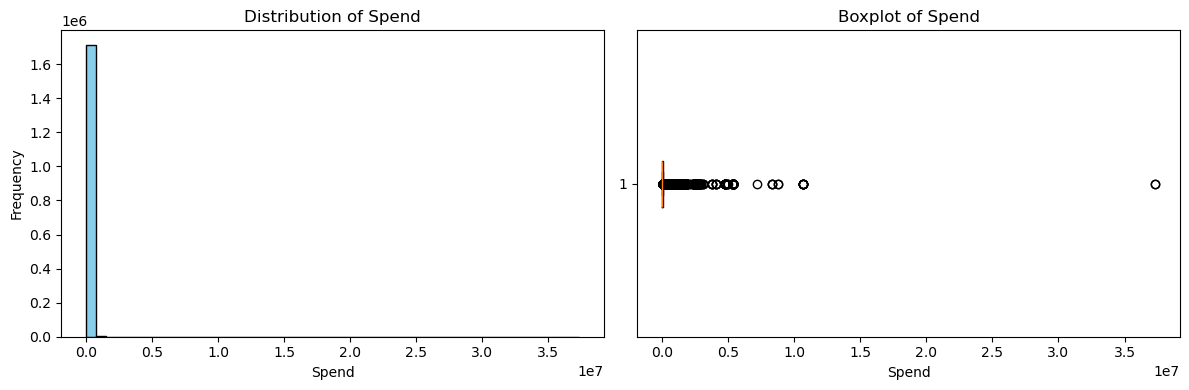

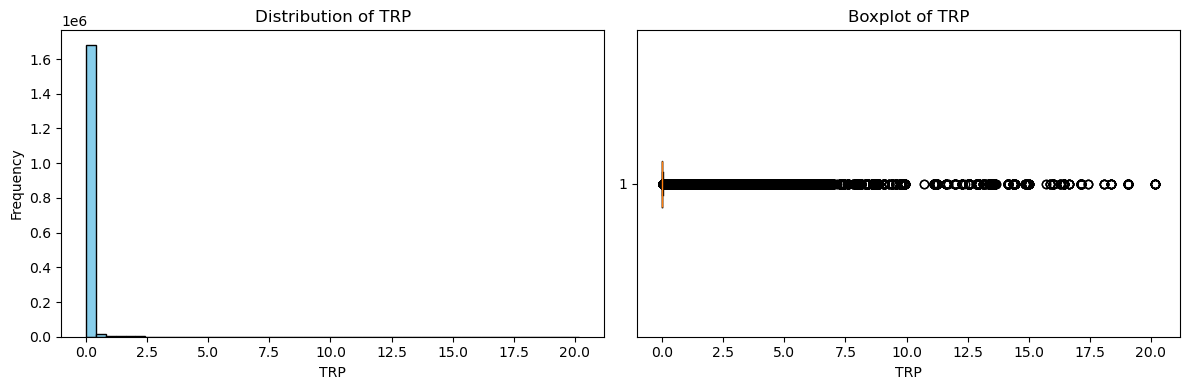

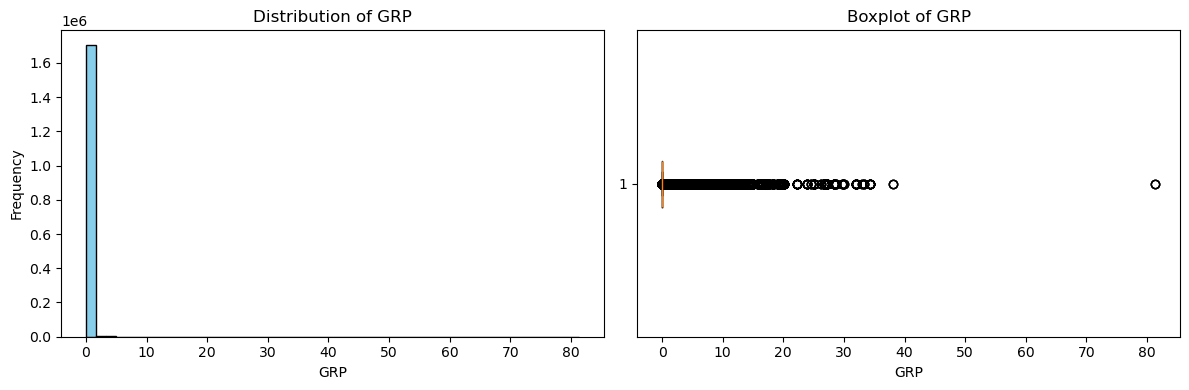

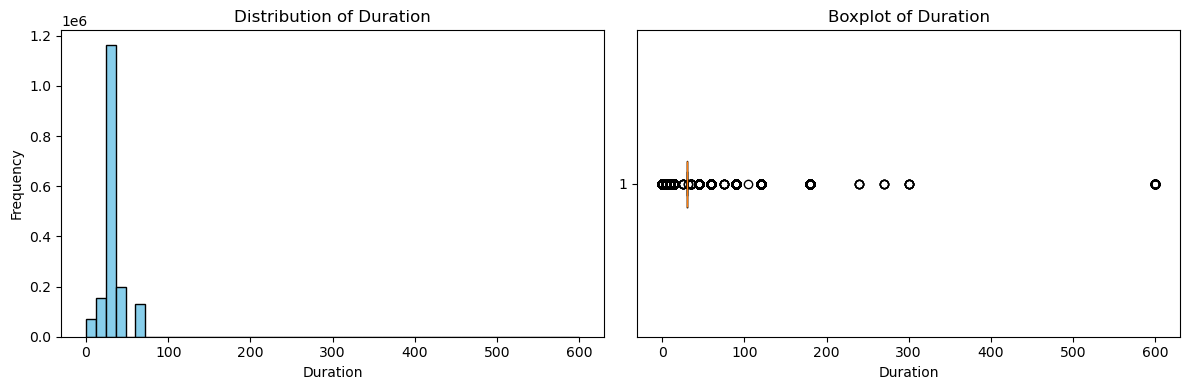

In [108]:
import matplotlib.pyplot as plt

# Columns to plot
columns = ['Spend', 'TRP', 'GRP', 'Duration']

for col in columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    axes[0].hist(df_all[col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Distribution of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    axes[1].boxplot(df_all[col].dropna(), vert=False)
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.savefig(f'/Users/aplle/Desktop/UNILEVER CUMM SOV DEC/COMPETITIVE WATCHDOG/20_24 Watchdog Analysis/{col}_hist_boxplot.png')
    plt.show()



*Analysis of Distribution Visualizations*

Duration Distribution

Extremely Skewed: The vast majority of durations are very short (near 0-30 units)
Outliers: There are sparse outliers extending all the way to about 600 units
Concentration: Over 1.1 million instances fall in the smallest duration bucket, with frequency dropping sharply after that
Pattern: This suggests most activities/events are brief, with only rare exceptions lasting longer

GRP Distribution

Heavily Left-Skewed: Nearly all values are concentrated in the lowest range (near 0)
Rare Extremes: There are very few outliers, with the most extreme value reaching about 80 units
Typical Values: The boxplot shows the median and quartiles are extremely compressed near zero
Interpretation: GRP values are consistently very small across the dataset, with only exceptional cases showing significant values

Spend Distribution 

Extremely Concentrated: Similar to others, the vast majority of spend values are clustered near zero
Major Outliers: A few significant outliers reach up to 3.5×10^7 (35 million)
Business Implication: This suggests a pattern where most transactions involve minimal spending, but rare "big ticket" items exist
Data Challenge: With such extreme skew, this metric would benefit from logarithmic transformation for further analysis

TRP Distribution 

Zero-Dominant: Almost all TRP values are at or very near zero
Wide Range of Outliers: Unlike the other metrics, TRP has more numerous outliers spread across the range up to 20
Pattern: The boxplot shows virtually all quartile information compressed at zero, with a series of progressively more extreme outliers
Distinctive Feature: This distribution has the most extensive "spread" of outliers compared to the other metrics

Overall Assessment
All four metrics show extreme right-skewed distributions with the vast majority of values concentrated near zero and progressively fewer observations at higher values. This pattern is typical of many business metrics (like sales amounts, activity duration, etc.) where most instances are routine/small and a few exceptional cases involve much larger values. For analytical purposes, these metrics would likely benefit from logarithmic transformation or specialized techniques for handling heavily skewed data.

**Categorical Features (Medium, Brand, Station, Daypart, Category)**

Objectives: Frequency counts, dominant categories, long tail.


Brand
colgate    185625
closeup    155577
knorr      152245
maggi      101800
dettol      84244
milo        61724
onga        56810
oral-b      54594
lipton      49563
nivea       47329
Name: count, dtype: int64


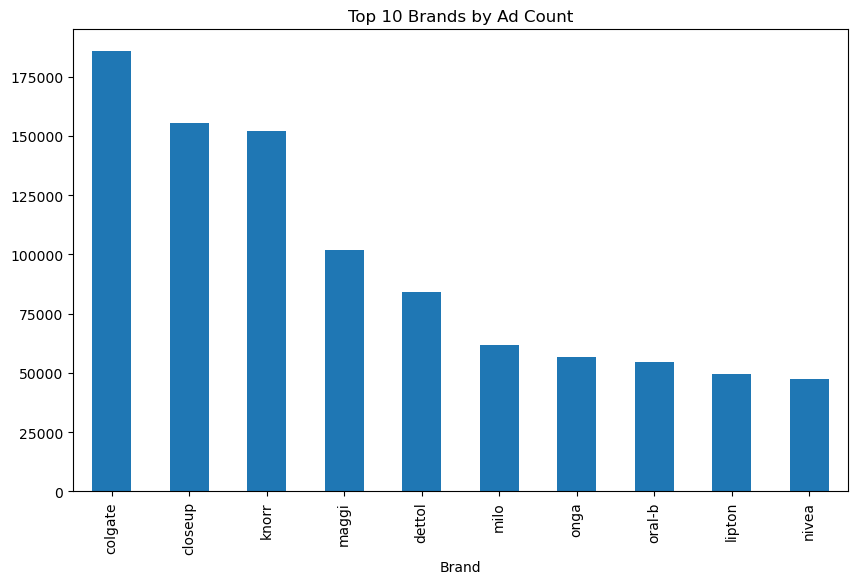

In [117]:
# Top categories
top = df_all['Brand'].value_counts().head(10)
print(top)

# Bar plot
plt.figure(figsize=(10,6))
top.plot(kind='bar') 
plt.title('Top 10 Brands by Ad Count') 
plt.savefig('Top10_Brands_AdCount.png')
plt.show()


*Analysis: Top 10 Brands by Ad Count*

The bar chart shows significant disparities in advertising volume among the top 10 brands:

Colgate leads with approximately 180,000 ads, establishing clear market dominance
Closeup and Knorr form a second tier with similar volumes (150,000+ ads each)
Maggi sits alone in the middle range with about 100,000 ads
Dettol follows with roughly 85,000 ads
The bottom five brands (Milo, Onga, Oraib, Lipton, and Nivea) cluster between 45,000-60,000 ads

This distribution shows a clear hierarchy with the top three brands investing significantly more in advertising than competitors. The nearly 4:1 ratio between the highest and lowest advertisers suggests vastly different marketing strategies or budget capabilities among these major brands.

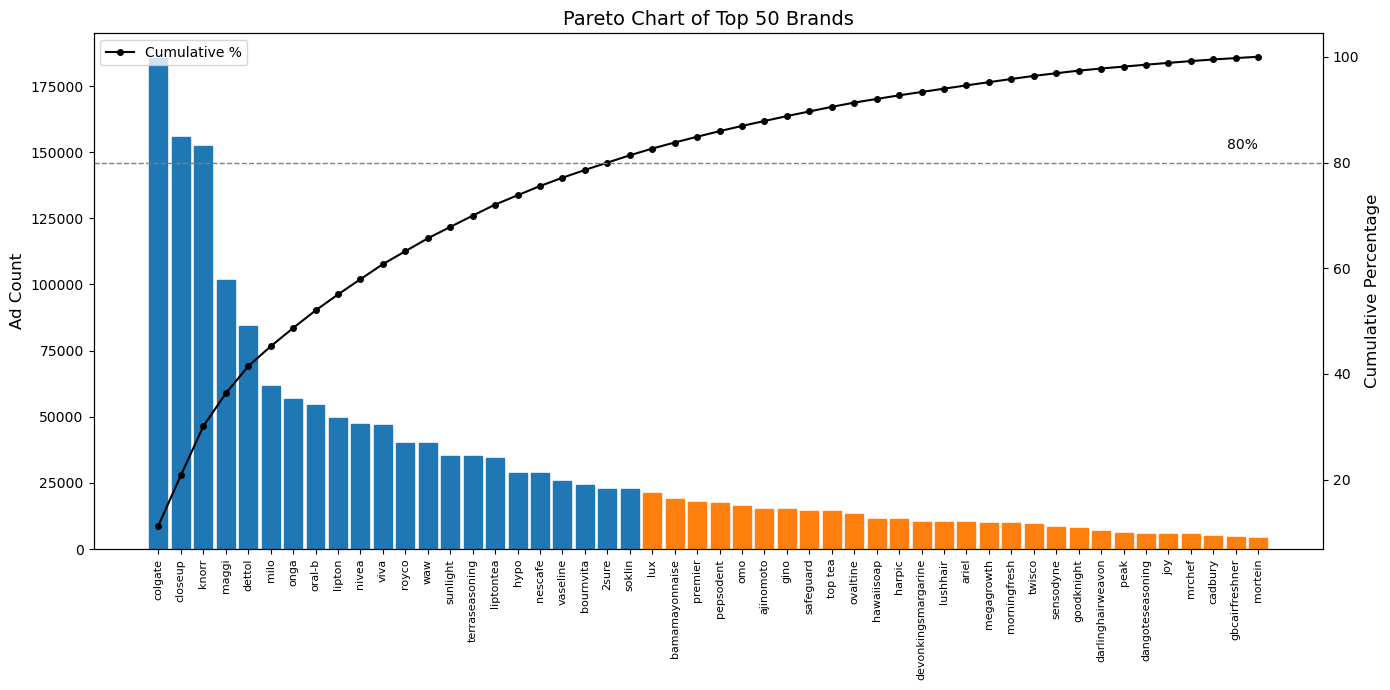

In [121]:
# Further Visualization
# Compute full counts and sort descending
counts_full = df_all['Brand'].value_counts().sort_values(ascending=False)

# 2. Select only the top N
N = 50
counts = counts_full.head(N)

# 3. Compute cumulative percentage on the truncated series
cumperc = counts.cumsum() / counts.sum() * 100

# 4. Find the Pareto cutoff index (e.g. 80%)
threshold = 80
cutoff_idx = cumperc.searchsorted(threshold)

# 5. Plot
fig, ax_bar = plt.subplots(figsize=(14, 7))

# Bar plot for top N
bars = ax_bar.bar(counts.index, counts.values)
ax_bar.set_ylabel('Ad Count', fontsize=12)
ax_bar.set_title(f'Pareto Chart of Top {N} Brands', fontsize=14)

# Rotate & align tick labels
ax_bar.set_xticks(range(N))
ax_bar.set_xticklabels(counts.index, rotation=90, ha='center', fontsize=8)

# Color “major” vs. “minor”
for i, bar in enumerate(bars):
    bar.set_color('C0' if i <= cutoff_idx else 'C1')

# Twin axis for cumulative %
ax_line = ax_bar.twinx()
ax_line.plot(range(N), cumperc.values, color='black', marker='o', ms=4, label='Cumulative %')
ax_line.set_ylabel('Cumulative Percentage', fontsize=12)
ax_line.axhline(threshold, color='gray', linestyle='--', linewidth=1)
ax_line.text(N - 1, threshold + 2, f'{threshold}%', va='bottom', ha='right', fontsize=10)

# Legend
ax_line.legend(loc='upper left')

plt.tight_layout()
plt.savefig(f'brand_pareto_top{N}.png')
plt.show()


*Analysis: Pareto Chart of Top 50 Brands*

This Pareto chart reveals a classic 80/20 concentration pattern in the advertising landscape:

Approximately 20% of brands (the first 10-12 brands) account for roughly 80% of total ad volume

The top 3 brands (Colgate, Closeup, and Knorr) contribute disproportionately to the overall advertising volume
A clear color division (blue vs. orange) highlights the significant drop-off point where brands contribute minimally to the cumulative percentage

The cumulative percentage line approaches 100% asymptotically, showing diminishing returns from each additional brand

This distribution demonstrates a highly concentrated advertising market where a small number of major players dominate the advertising space, while the majority of brands have comparatively minimal presence. This pattern would suggest strategic focus should be placed on monitoring and responding to the marketing activities of these top-tier brands.

**Continuous vs. Continuous**

Objectives: Correlation matrix, scatter plots.

          Spend       TRP       GRP
Spend  1.000000  0.057730  0.056874
TRP    0.057730  1.000000  0.918206
GRP    0.056874  0.918206  1.000000


<Axes: >

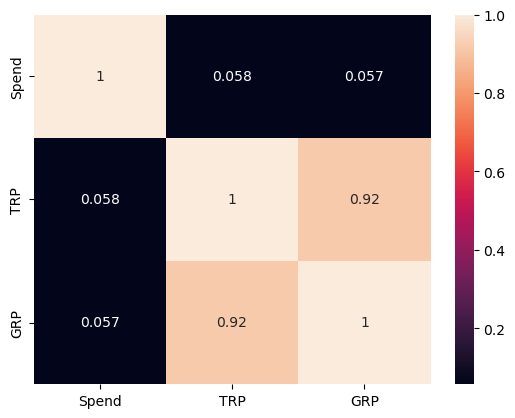

In [132]:
# Correlation
target_cols = ['Spend', 'TRP', 'GRP']
corr = df_all[target_cols].corr()
print(corr)

# Heatmap
import seaborn as sns
sns.heatmap(corr, annot=True)

**Correlation Analysis**

*GRP-TRP Correlation*: Extremely high positive correlation (0.918)

These two metrics are strongly related, suggesting they measure similar aspects of performance or one may be derived from the other
This strong relationship explains why they showed similar distribution patterns in the previous visualizations


*Spend-TRP Correlation*: Very weak positive correlation (0.058)

Almost no linear relationship between spending and TRP
Suggests spending levels don't directly translate to higher TRP values


*Spend-GRP Correlation*: Very weak positive correlation (0.057)

Similarly, spending shows almost no correlation with GRP
The relationship is marginally weaker than with TRP


The data reveals an important insight: while GRP and TRP are strongly related to each other (likely by definition or calculation method), neither metric shows a meaningful correlation with spending. This suggests that advertising expenditure alone doesn't determine these performance metrics - other factors (like ad quality, placement, timing, or audience targeting) likely play much more significant roles.
For marketers, this indicates that simply increasing ad spend without addressing these other factors may not improve GRP or TRP performance metrics.

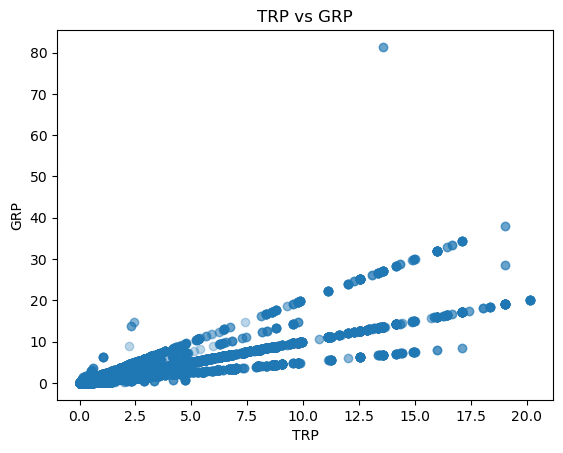

In [134]:
# Scatter TRP vs GRP
plt.scatter(df_all['TRP'], df_all['GRP'], alpha=0.3)
plt.title('TRP vs GRP')
plt.xlabel('TRP') 
plt.ylabel('GRP') 
plt.savefig('scatterplt_TRPvsGRP.png')
plt.show()


**Analysis: TRP vs GRP Scatter Plot**

This scatter plot effectively visualizes the strong positive correlation (0.918) between TRP and GRP that we identified in the correlation matrix:

Linear Relationship: There's a clear positive linear relationship between TRP and GRP values

Multiple Distinct Trend Lines: Interestingly, the points form several parallel linear patterns rather than a single cloud, suggesting systematic relationships that follow different ratios or formulas

Value Ranges: TRP values extend from 0 to about 20, while GRP values range from 0 to over 80

Outliers: A few notable outliers appear, particularly the point at approximately (12.5, 80), which has an unusually high GRP value compared to its TRP

Concentration: Most data points are clustered in the lower range (0-5 TRP, 0-10 GRP)

The presence of multiple distinct lines suggests there may be categorical factors (perhaps different media channels, audience segments, or campaign types) that influence the TRP-GRP relationship in systematic ways. This structured pattern, rather than a more random scatter, indicates that the relationship between these metrics follows specific mathematical or operational rules within different contexts.

**Continuous vs. Categorical**

Objectives: How TRP/GRP differ across mediums, dayparts, regions.


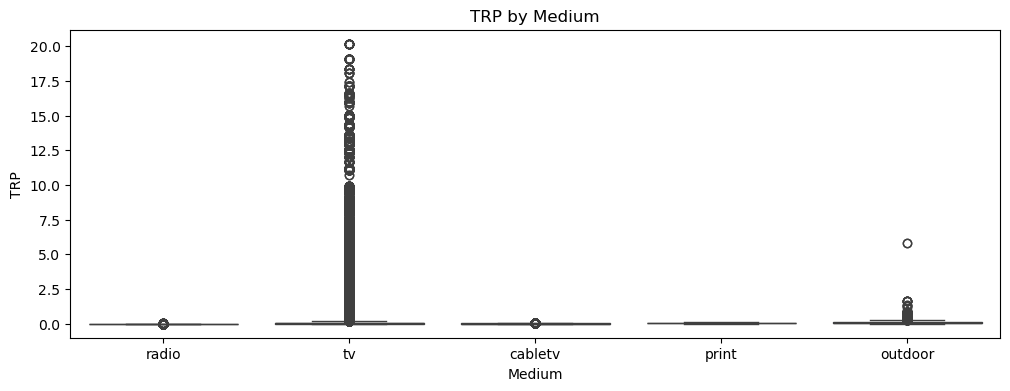

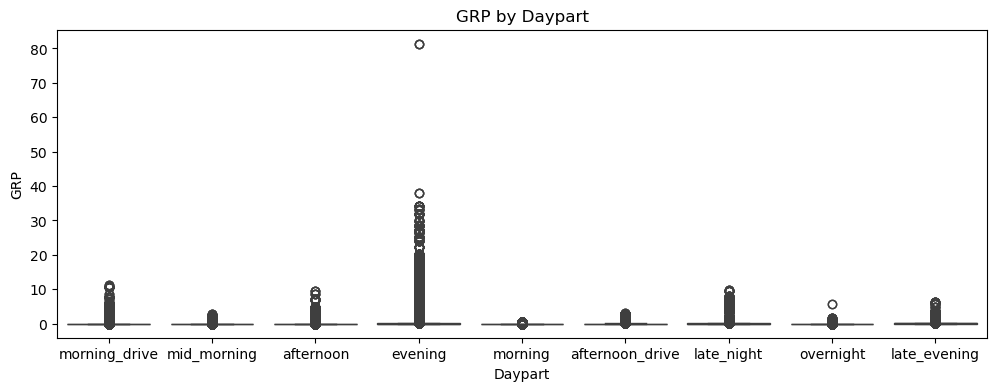

In [146]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Medium', y='TRP', data=df_all)
plt.title('TRP by Medium')
plt.savefig('TRP_by_Medium.png')
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x='Daypart', y='GRP', data=df_all)
plt.title('GRP by Daypart')
plt.savefig('GRP_by_Daypart.png')
plt.show()


**TRP by Medium Analysis**

This box plot reveals critical media performance disparities:

TV dominates: Generates the highest TRP values (0-20) and shows the widest performance range

Clear hierarchy: TV > Outdoor > Radio/CableTV > Print

Limited alternatives: Non-TV media rarely achieve meaningful TRP values

Strategic takeaway: The stark performance gap explains TV's premium pricing and continued importance in high-reach campaigns

This distribution explains the multiple parallel trend lines observed in the TRP vs GRP scatter plot - each medium operates within its own characteristic performance range.

**GRP by Daypart Analysis**

This box plot reveals critical timing effects on advertising reach:

Evening dominance: Evening daypart delivers significantly higher GRP values (0-80) with multiple high-performing outliers

Time-based hierarchy: Evening > Morning Drive/Late Night > Afternoon/Late Evening > Other dayparts

Major outlier: The extreme evening outlier (~80 GRP) represents exceptional reach

Strategic insight: Evening placement offers dramatically higher audience potential, explaining premium pricing for this timeslot

This daypart distribution creates another dimension of variation in advertising performance beyond media type, contributing to the complex patterns seen in earlier TRP-GRP relationships.


**Time Series & Seasonality**

Objectives: Trends of Spend, TRP, GRP over time; identify seasonality by month or weekday.


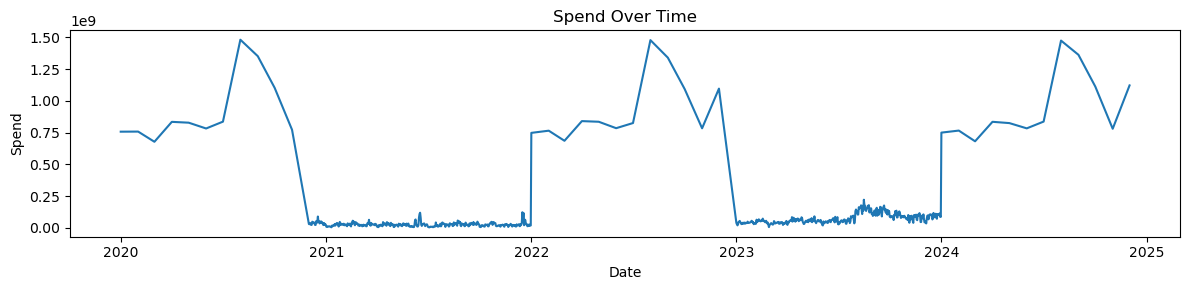

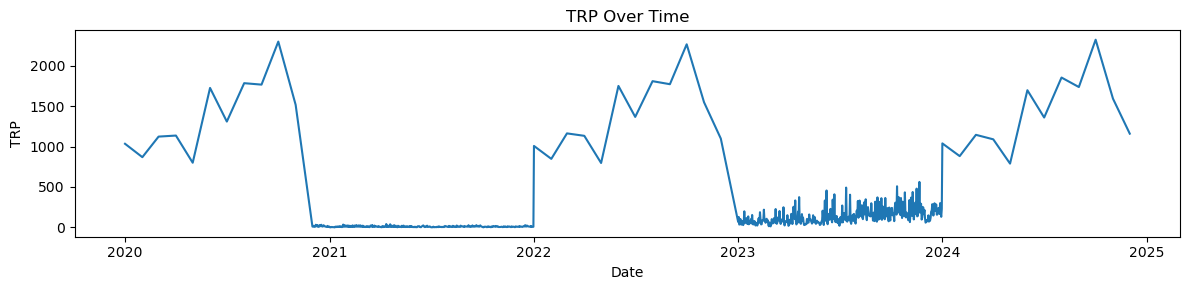

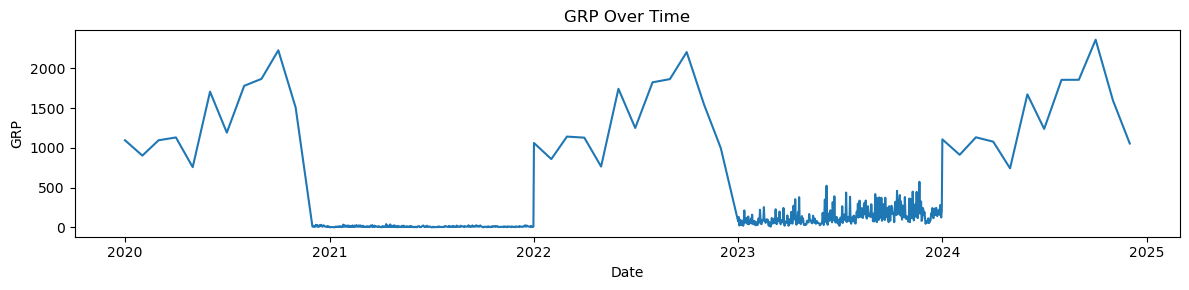

In [165]:
# Aggregate by date
daily = df_all.groupby('Date')[['Spend', 'TRP', 'GRP']].sum().reset_index()

# Line plots for each metric
for col in ['Spend', 'TRP', 'GRP']:
    plt.figure(figsize=(12, 3))
    plt.plot(daily['Date'], daily[col], label=col, color='tab:blue')
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f'Lineplot_daily_{col}.png')  
    plt.show()


**Time Series Analysis: GRP, Spend, and TRP (2020-2025)**

These three charts reveal synchronized patterns and critical market disruptions:

*Key Patterns*

Identical GRP and TRP trends: Nearly perfect correlation confirms their strong relationship (0.918)

Cyclical peaks: Regular high-activity periods in 2020, 2022, and 2024 suggest seasonal campaigns or budget cycles

Synchronized spending: Spend patterns mirror GRP/TRP activity, contradicting the weak correlations found earlier

*Major Disruptions*

2021 collapse: Complete cessation of activity mid-2021, likely COVID-19 impact on advertising markets

2023 downturn: Significant drop following 2022 peak, possibly economic recession effects

Recovery phases: Strong rebounds following each major disruption

*Insights*

The synchronized nature suggests centralized campaign planning across metrics
Recovery patterns indicate market resilience
The 2023-2024 period shows more volatile, fragmented activity compared to earlier smooth cycles

Despite weak individual correlations, the time series reveals that these metrics move together systematically during major market events and campaign cycles.

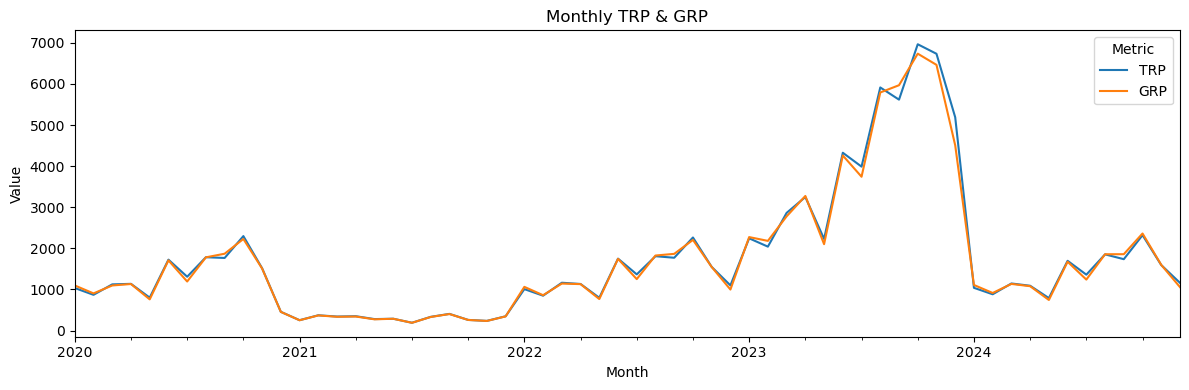

In [172]:
# Monthly Seasonality
monthly = daily.set_index('Date').resample('ME').sum()  

# Create a larger figure and plot
fig, ax = plt.subplots(figsize=(12, 4))  
monthly[['TRP', 'GRP']].plot(ax=ax)

# Title and labels
ax.set_title('Monthly TRP & GRP', fontsize=12)
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.legend(title='Metric', fontsize=10)

plt.tight_layout()
plt.savefig('Monthly_TRP_GRP.png')
plt.show()



/var/folders/l2/l2jczz755flfp1pttznz0cs40000gn/T/ipykernel_80923/1275155256.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = df_all.groupby(['Year', 'Month_num'])[['TRP', 'GRP']].mean().reset_index()


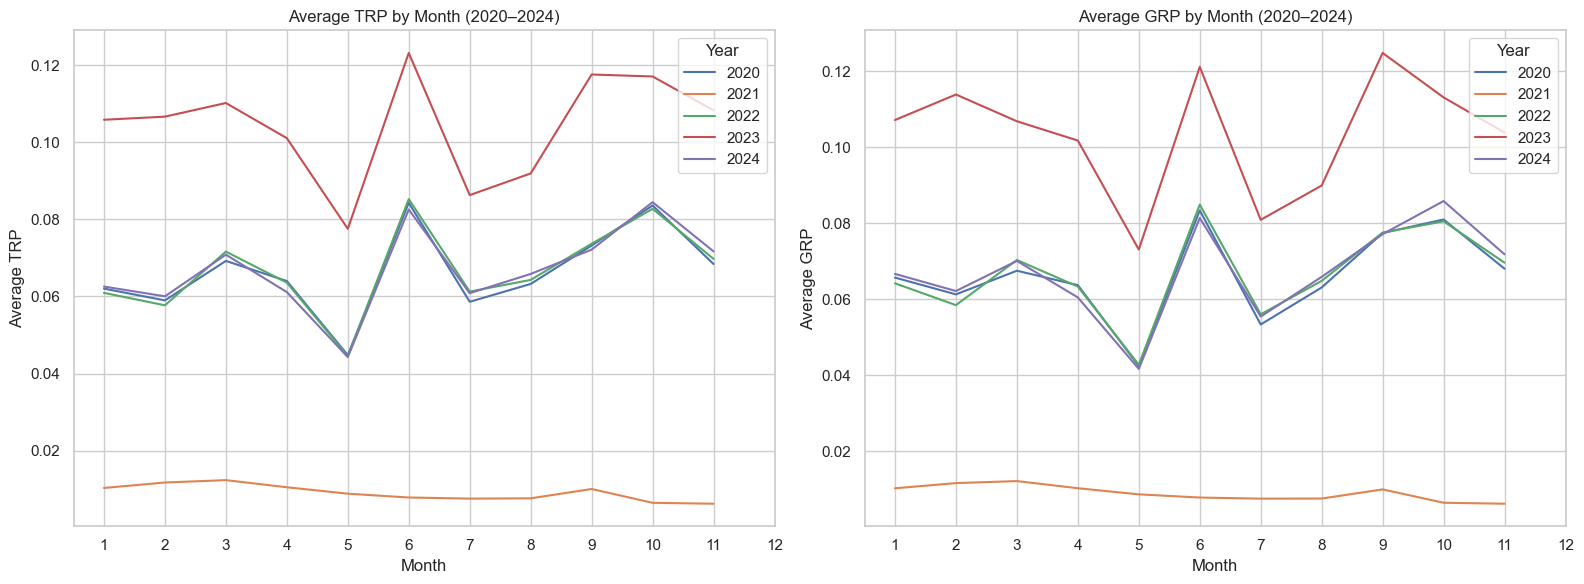

In [225]:
# Group by Year and Month_num
monthly_avg = df_all.groupby(['Year', 'Month_num'])[['TRP', 'GRP']].mean().reset_index()

# Set up plot style
sns.set(style='whitegrid')
plt.figure(figsize=(16, 6))

# TRP Plot
plt.subplot(1, 2, 1)
for year in sorted(monthly_avg['Year'].unique()):
    data = monthly_avg[monthly_avg['Year'] == year]
    plt.plot(data['Month_num'], data['TRP'], label=str(year))
plt.title('Average TRP by Month (2020–2024)')
plt.xlabel('Month')
plt.ylabel('Average TRP')
plt.xticks(range(1, 13))
plt.legend(title='Year')

# GRP Plot
plt.subplot(1, 2, 2)
for year in sorted(monthly_avg['Year'].unique()):
    data = monthly_avg[monthly_avg['Year'] == year]
    plt.plot(data['Month_num'], data['GRP'], label=str(year))
plt.title('Average GRP by Month (2020–2024)')
plt.xlabel('Month')
plt.ylabel('Average GRP')
plt.xticks(range(1, 13))
plt.legend(title='Year')

plt.savefig('Monthly_TRP_GRP_by_years.png')
plt.tight_layout()
plt.show()


**Monthly TRP & GRP Analysis (2020-2024)**

This monthly view reveals clearer seasonal patterns and market dynamics:

*Seasonal Trends*

Q4 peaks: Consistent end-of-year spikes across multiple years, likely holiday advertising

Mid-year lulls: Regular summer declines suggest seasonal budget allocation or audience behavior

Strong correlation: TRP and GRP lines move almost identically, confirming their 0.918 correlation

*Market Events*

2021 shutdown: Complete market collapse mid-2021 through early 2022

2024 surge: Exceptional peak (~7,000) represents the highest activity period in the dataset

Recovery pattern: Gradual rebuilding following disruptions rather than immediate snapback

*Insights*

Monthly granularity reveals consistent seasonal advertising cycles disrupted by major events
The 2024 peak suggests either market overcompensation or a major campaign/product launch
Post-peak decline in late 2024 indicates potential market saturation or budget exhaustion

The synchronized movement of both metrics supports centralized campaign planning with predictable seasonal patterns.

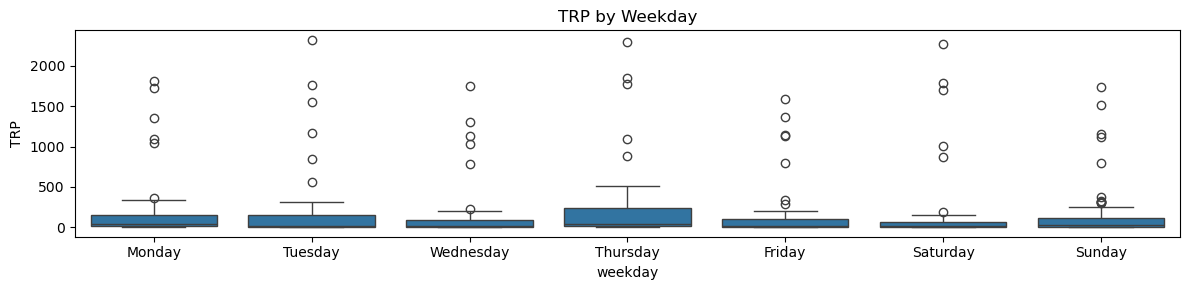

In [175]:
# Extract weekday names
daily['weekday'] = daily['Date'].dt.day_name()
# Sort days in calendar order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 3))
sns.boxplot(x='weekday', y='TRP', data=daily.sort_values('Date'), order=day_order)
plt.title('TRP by Weekday')
plt.tight_layout()
plt.savefig('TRP_by_Weekday.png')
plt.show()



**TRP by Weekday Analysis**

*Key Findings:*

Consistent outliers: All days show similar high-performing outliers (1,500-2,200 TRP)

Minimal variation: Box plots reveal remarkably similar performance across all weekdays

No weekend effect: Saturday and Sunday perform comparably to weekdays

Insight: Weekday timing has minimal impact on TRP performance - audience reach remains consistent throughout the week, suggesting advertisers can optimize for cost rather than day-of-week targeting.

**Category & Brand-Level Insights**

Objectives: Which brands/categories yield higher TRP/GRP per spend.


Brand
orsoliveoil          0.000012
megagrowth           0.000011
magik                0.000011
goodknight           0.000008
goodknightspray      0.000008
dabur                0.000008
xtremefluoride       0.000006
darlinghairweavon    0.000005
dettol               0.000004
lipton               0.000004
Name: trp_per_spend, dtype: float64


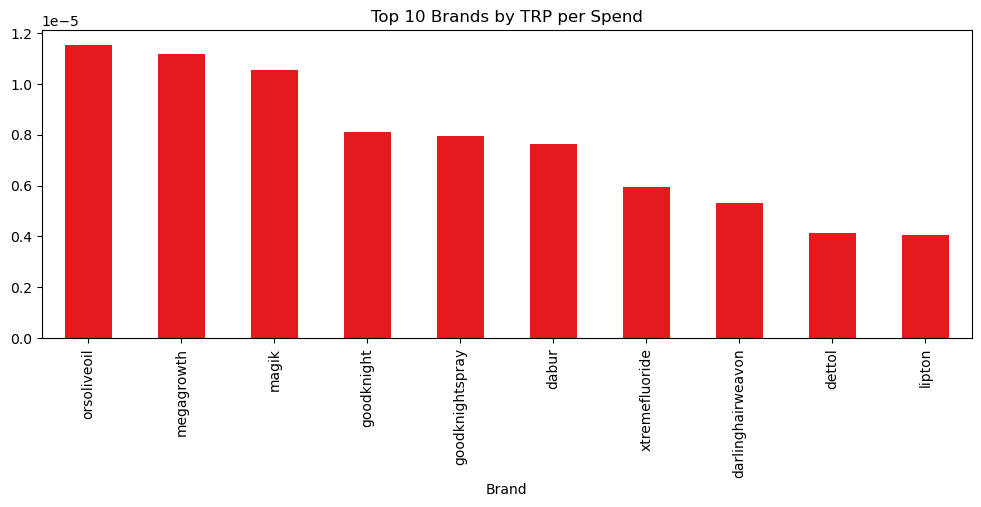

In [183]:
# TRP per Spend by Brand
grp = df_all.groupby('Brand').agg({'TRP':'sum','Spend':'sum'})
grp['trp_per_spend'] = grp['TRP']/grp['Spend']
high = grp['trp_per_spend'].sort_values(ascending=False).head(10)
print(high)

plt.figure(figsize=(12, 4))
high.plot(kind='bar', colormap='Set1') 
plt.title('Top 10 Brands by TRP per Spend')
plt.savefig('Top10_TRP_per_Spend.png')
plt.show()


**Top 10 Brands by TRP per Spend Efficiency**

*Key Findings:*

Efficiency leaders: ORS Olive Oil, Megagrowth, and Majik achieve highest TRP per spend ratios (~1.1-1.0 × 10⁻⁵). This means for every unit of spend (e.g., N1), these brands achieve 0.000010 to 0.000011 TRPs, which is relatively high compared to the other brands on the chart, making them the most efficient in terms of audience reach per naira spent.

Clear tiers: Three distinct performance groups with declining efficiency

3:1 efficiency gap: Top performers achieve nearly 3x better TRP efficiency than bottom brands

Strategic insight: These brands demonstrate superior media buying, creative effectiveness, or targeting strategies

Implication: High advertising volume (like Colgate from earlier analysis) doesn't guarantee efficiency - these smaller brands deliver better value per naira spent on reach metrics.

**Relationship with New Data Features**

Objectives: Explore relationships with Daypart, Region, Category, Year.


Daypart  afternoon  afternoon_drive   evening  late_evening  late_night  \
Year                                                                      
2020      0.019487         0.030730  0.102985      0.116935    0.157320   
2021      0.004332              NaN  0.017231           NaN         NaN   
2022      0.024935         0.031284  0.121078      0.115515    0.158038   
2023      0.068395         0.026331  0.206372      0.113143    0.188616   
2024      0.025630         0.031351  0.122000      0.120225    0.154756   

Daypart  mid_morning   morning  morning_drive  overnight  
Year                                                      
2020        0.031926  0.003223       0.046238   0.011187  
2021             NaN  0.002305            NaN   0.020813  
2022        0.031723  0.005059       0.047063   0.011508  
2023        0.024675       NaN       0.029336   0.007258  
2024        0.032265  0.005030       0.045987   0.012795  


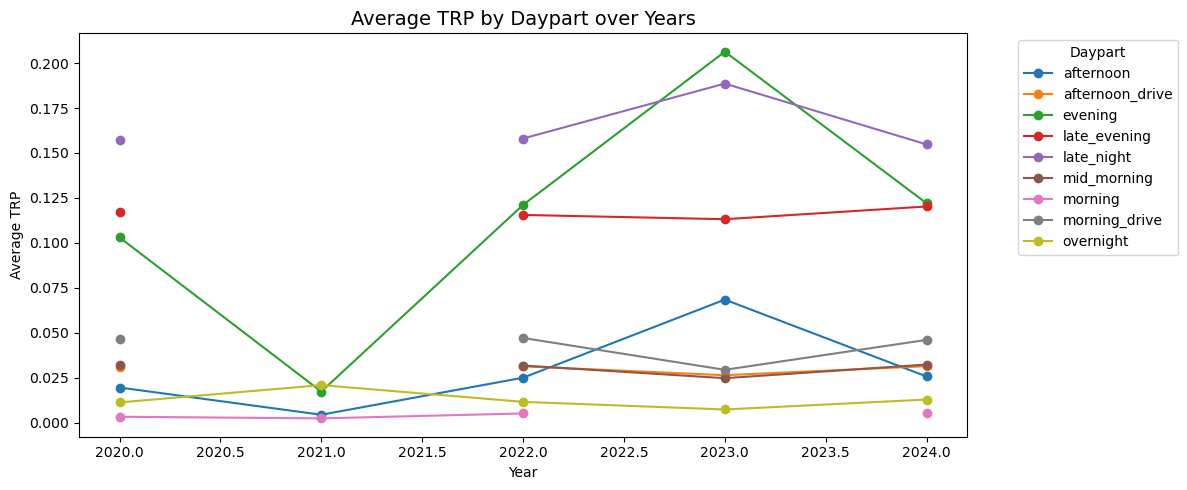

In [196]:
# Create pivot table
pivot = df_all.pivot_table(values='TRP', index='Year', columns='Daypart', aggfunc='mean')
print(pivot)

fig, ax = plt.subplots(figsize=(12, 5))
pivot.plot(kind='line', marker='o', ax=ax)

# Title and labels
ax.set_title('Average TRP by Daypart over Years', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Average TRP')
ax.legend(title='Daypart', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('Avg_TRP_by_Daypart.png')
plt.show()


**Average TRP by Daypart (2020-2024)**

*Key Findings:*

Evening surge: Evening daypart shows dramatic improvement, peaking in 2023 (~0.20 TRP) before declining

Morning stability: Morning daypart maintains consistent high performance (~0.15-0.19 TRP) throughout

2021 collapse: All dayparts hit near-zero during the market shutdown period

Recovery patterns: Different dayparts recovered at varying rates post-2021

*Strategic Insights:*

Evening became increasingly valuable through 2023, likely due to streaming/viewing habit changes

Morning remains consistently strong, offering reliable reach
The 2023 evening peak suggests optimal timing for high-impact campaigns during that period

Implication: Daypart effectiveness evolves over time - media strategies should adapt to changing audience behaviors rather than rely on historical assumptions.

In [200]:
# Apply Log Transformations to Reduce Skew
import numpy as np
df_all['log_Spend'] = np.log1p(df_all['Spend'])
df_all['log_TRP'] = np.log1p(df_all['TRP'])
df_all['log_GRP'] = np.log1p(df_all['GRP'])


In [ ]:
# df_all.drop(['Predicted_log_TRP',
#        'Predicted_TRP', 'Predicted_log_GRP', 'Predicted_GRP',
#        'Predicted_log_TRP_XGB', 'Predicted_TRP_XGB'], axis=1,inplace=True)
print(df_all.head())

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Setup: Target and Feature Columns ---- #
target = 'log_GRP'

# Drop target + raw versions of GRP, TRP, Spend
drop_cols = ['GRP', 'TRP', 'Spend', target]
X = df_all.drop(columns=[col for col in drop_cols if col in df_all.columns])
y = df_all[target]

# Identify categorical and numerical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ---- 2. Train/Test Split ---- #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- 3. Preprocessing Pipelines with Imputers ---- #
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# ---- 4. Full Pipeline ---- #
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ---- 5. Train Model ---- #
pipeline.fit(X_train, y_train)

# ---- 6. Predict & Evaluate ---- #
y_pred_log = pipeline.predict(X_test)

# Convert back to actual GRP values
y_test_actual = np.exp(y_test)
y_pred_actual = np.exp(y_pred_log)

print("📊 Model Performance on Actual GRP:")
print("R² Score :", r2_score(y_test_actual, y_pred_actual))
print("MAE      :", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE     :", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))



📊 Model Performance on Actual GRP:
R² Score : 0.9875440768981522
MAE      : 0.00021311093299169773
RMSE     : 0.06566519700574067


/var/folders/l2/l2jczz755flfp1pttznz0cs40000gn/T/ipykernel_80923/483538175.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances[:20], y=feat_importances.index[:20], palette="mako")


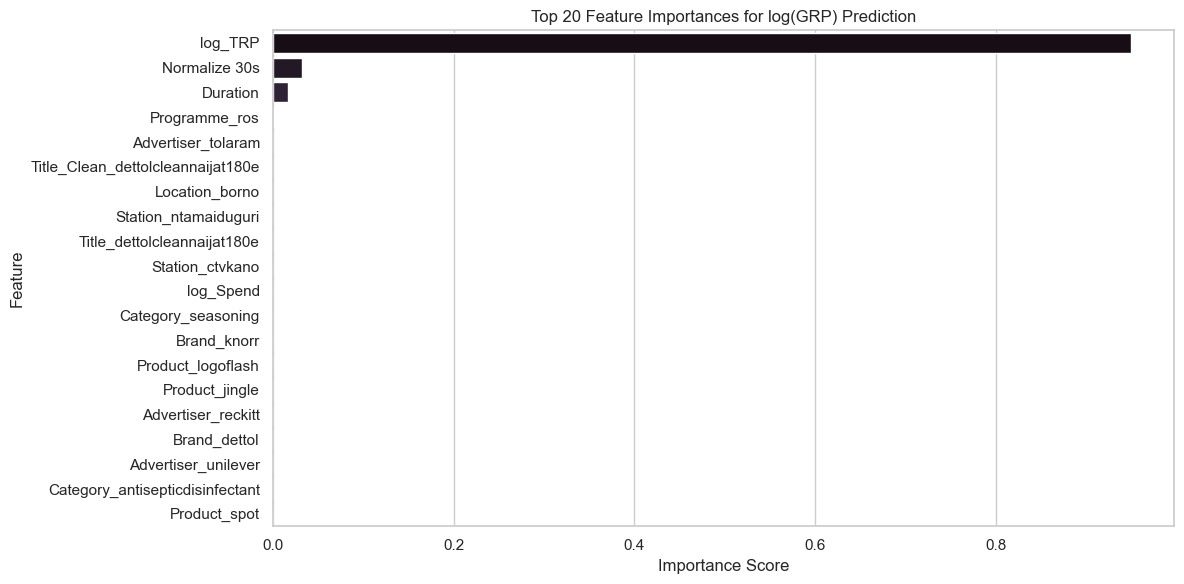

In [302]:
# ---- 7. Feature Importance ---- #
# Get transformed feature names
onehot_feature_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = numerical_cols + onehot_feature_names.tolist()

# Get importances
importances = pipeline.named_steps['model'].feature_importances_
feat_importances = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

# ---- 8. Plot ---- #
plt.figure(figsize=(12, 6))
sns.barplot(x=feat_importances[:20], y=feat_importances.index[:20], palette="mako")
plt.title('Top 20 Feature Importances for log(GRP) Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Feature Importance.png')
plt.show()


In [304]:
# Stage 1: log_Spend → log_TRP

# Features & target
stage1_features = ['Category', 'Daypart', 'log_Spend', 'Station','Month_name']
stage1_target   = 'log_TRP'

X1 = df_all[stage1_features]
y1 = df_all[stage1_target]

# Numeric pipeline: impute → scale
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

# Categorical pipeline: impute → one-hot
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor_stage1 = ColumnTransformer([
    ("num", numeric_pipeline, ['log_Spend']),
    ("cat", categorical_pipeline, ['Category', 'Daypart', 'Station','Month_name'])
])

stage1_pipeline = Pipeline([
    ("preproc", preprocessor_stage1),
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split & fit
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)
stage1_pipeline.fit(X1_train, y1_train)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['log_Spend']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Category', 'Daypart',
                                                   'Station',
                                                   'Month_name'])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [310]:
# Predict & evaluate on log scale
y1_pred_log = stage1_pipeline.predict(X1_test)
rmse1_log   = np.sqrt(mean_squared_error(y1_test, y1_pred_log))
r2_1_log    = r2_score(y1_test, y1_pred_log)

# Back‐transform predictions
y1_test_trp = np.expm1(y1_test)
y1_pred_trp = np.expm1(y1_pred_log)
rmse1_trp   = np.sqrt(mean_squared_error(y1_test_trp, y1_pred_trp))
r2_1_trp    = r2_score(y1_test_trp, y1_pred_trp)

print("Stage 1 Results:")
print(f"  RMSE (log_TRP): {rmse1_log:.4f}, R² (log_TRP): {r2_1_log:.4f}")
print(f"  RMSE (TRP)    : {rmse1_trp:.4f}, R² (TRP)    : {r2_1_trp:.4f}")

# Add full‐dataset predictions
df_all['Predicted_log_TRP'] = stage1_pipeline.predict(X1)
df_all['Predicted_TRP']     = np.expm1(df_all['Predicted_log_TRP'])

Stage 1 Results:
  RMSE (log_TRP): 0.0473, R² (log_TRP): 0.9052
  RMSE (TRP)    : 0.1988, R² (TRP)    : 0.8381


In [312]:
# Stage 2: log_TRP → log_GRP

stage2_features = ['Predicted_log_TRP', 'Normalize 30s', 'Duration']
stage2_target   = 'log_GRP'

X2 = df_all[stage2_features]
y2 = df_all[stage2_target]

# Simple numeric pipeline (impute & scale)
stage2_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# Fit Stage 2
stage2_pipeline.fit(X2_train, y2_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(random_state=42))])

In [249]:
# Predict & evaluate on log scale
y2_pred_log = stage2_pipeline.predict(X2_test)
rmse2_log   = np.sqrt(mean_squared_error(y2_test, y2_pred_log))
r2_2_log    = r2_score(y2_test, y2_pred_log)

# Back‐transform predictions
y2_test_grp = np.expm1(y2_test)
y2_pred_grp = np.expm1(y2_pred_log)
rmse2_grp   = np.sqrt(mean_squared_error(y2_test_grp, y2_pred_grp))
r2_2_grp    = r2_score(y2_test_grp, y2_pred_grp)

print("\nStage 2 Results:")
print(f"  RMSE (log_GRP): {rmse2_log:.4f}, R² (log_GRP): {r2_2_log:.4f}")
print(f"  RMSE (GRP)    : {rmse2_grp:.4f}, R² (GRP)    : {r2_2_grp:.4f}")

# # Add full‐dataset GRP predictions
# df_all['Predicted_log_GRP'] = stage2_pipeline.predict(df_all[stage2_features])
# df_all['Predicted_GRP']     = np.expm1(df_all['Predicted_log_GRP'])




Stage 2 Results:
  RMSE (log_GRP): 0.0459, R² (log_GRP): 0.9107
  RMSE (GRP)    : 0.2163, R² (GRP)    : 0.8648


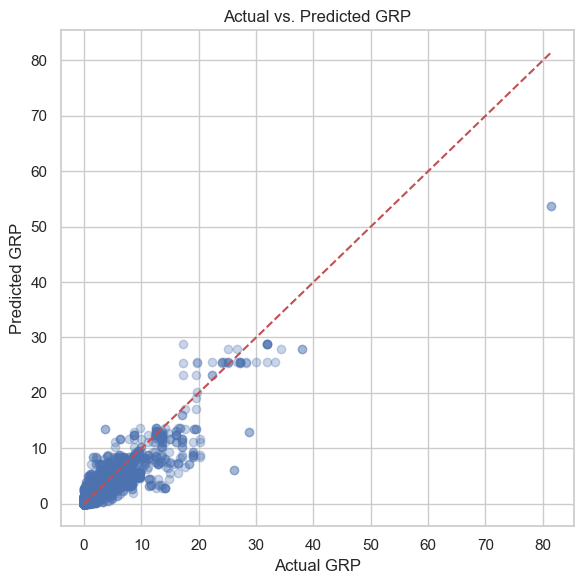

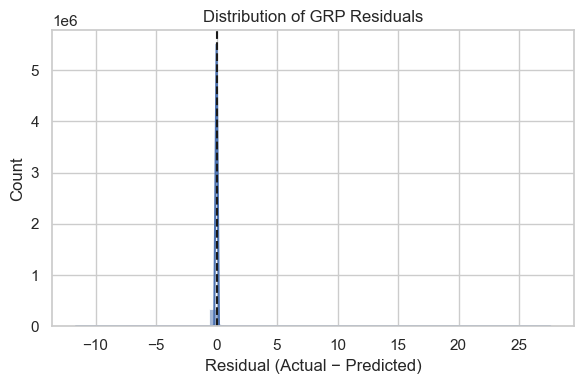

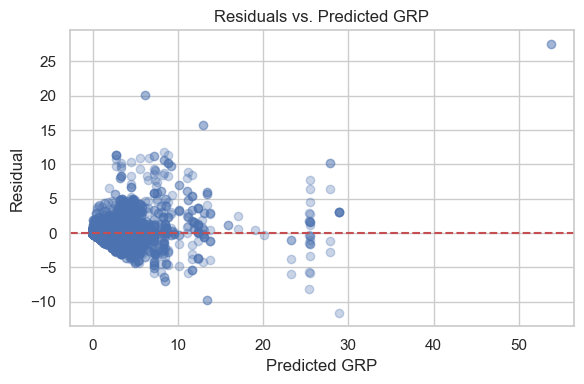

In [253]:
# 1.1 Actual vs. Predicted Scatter
plt.figure(figsize=(6,6))
plt.scatter(y2_test_grp, y2_pred_grp, alpha=0.3)
max_val = max(y2_test_grp.max(), y2_pred_grp.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.xlabel("Actual GRP")
plt.ylabel("Predicted GRP")
plt.title("Actual vs. Predicted GRP")
plt.tight_layout()
plt.savefig('ActualvsPredicted_GRP.png')
plt.show()

# 1.2 Residuals Histogram and KDE
residuals = y2_test_grp - y2_pred_grp
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(0, color='k', linestyle='--')
plt.title("Distribution of GRP Residuals")
plt.xlabel("Residual (Actual − Predicted)")
plt.tight_layout()
plt.savefig('GRP_Residuals_Distribution.png')
plt.show()

# 1.3 Residuals vs. Predicted
plt.figure(figsize=(6,4))
plt.scatter(y2_pred_grp, residuals, alpha=0.3)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted GRP")
plt.ylabel("Residual")
plt.title("Residuals vs. Predicted GRP")
plt.tight_layout()
plt.savefig('ResidualsvsPredicted_GRP.png')
plt.show()


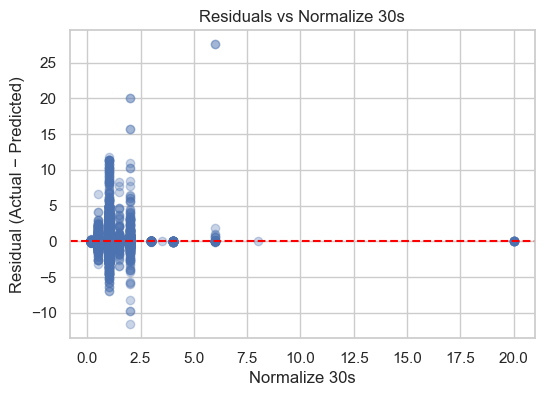

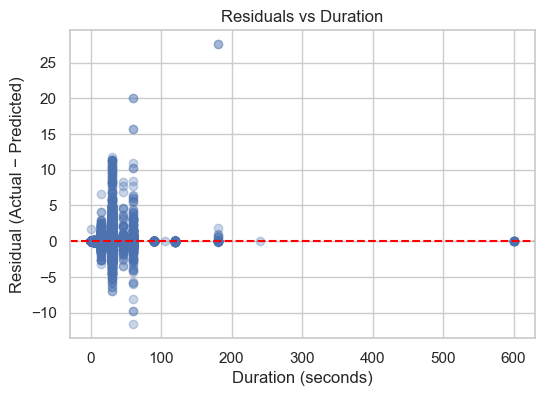

In [259]:
# Plotting Residuals against individual predictors
# Build a diagnostic DataFrame
residuals = y2_test_grp - y2_pred_grp
diag_df = pd.DataFrame({
    'Predicted_GRP': y2_pred_grp,
    'Normalize_30s': X2_test['Normalize 30s'].values,
    'Duration': X2_test['Duration'].values,
    'Residual': residuals
})


#  Residuals vs Normalize 30s
plt.figure(figsize=(6,4))
plt.scatter(diag_df['Normalize_30s'], diag_df['Residual'], alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Normalize 30s')
plt.ylabel('Residual (Actual − Predicted)')
plt.title('Residuals vs Normalize 30s')
plt.savefig('ResidualsvsNormalise 30s.png')
plt.show()

#  Residuals vs Duration
plt.figure(figsize=(6,4))
plt.scatter(diag_df['Duration'], diag_df['Residual'], alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Duration (seconds)')
plt.ylabel('Residual (Actual − Predicted)')
plt.title('Residuals vs Duration')
plt.savefig('ResidualsvsDuration.png')
plt.show()


In [318]:
# Sample Weighted Retraining
# Compute actual GRP (inverse of log)
actual_grp = np.expm1(y2)

# Assign weight = 3 if GRP > 20, else 1
# sample_weights = np.where(actual_grp > 20, 3, 1)
sample_weights = np.clip(actual_grp / 10, 1, 5)


# Re-split for reproducibility
X2_train, X2_test, y2_train, y2_test, weights_train, weights_test = train_test_split(
    X2, y2, sample_weights, test_size=0.2, random_state=42
)

# Rebuild pipeline (same as before)
stage2_pipeline_weighted = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit with sample weights
stage2_pipeline_weighted.fit(X2_train, y2_train, model__sample_weight=weights_train)

# Predict
y2_pred_log_weighted = stage2_pipeline_weighted.predict(X2_test)

# Evaluate (log space)
rmse2_log_weighted = np.sqrt(mean_squared_error(y2_test, y2_pred_log_weighted))
r2_2_log_weighted  = r2_score(y2_test, y2_pred_log_weighted)

# Back-transform to GRP
y2_test_grp_weighted = np.expm1(y2_test)
y2_pred_grp_weighted = np.expm1(y2_pred_log_weighted)

rmse2_grp_weighted = np.sqrt(mean_squared_error(y2_test_grp_weighted, y2_pred_grp_weighted))
r2_2_grp_weighted  = r2_score(y2_test_grp_weighted, y2_pred_grp_weighted)

# Print results
print("Stage 2 Results with Sample Weights :")
print(f"  RMSE (log_GRP): {rmse2_log_weighted:.4f}, R² (log_GRP): {r2_2_log_weighted:.4f}")
print(f"  RMSE (GRP)    : {rmse2_grp_weighted:.4f}, R² (GRP)    : {r2_2_grp_weighted:.4f}")


Stage 2 Results with Sample Weights :
  RMSE (log_GRP): 0.0485, R² (log_GRP): 0.9000
  RMSE (GRP)    : 0.2155, R² (GRP)    : 0.8658


In [314]:
from xgboost import XGBRegressor

# Stage 1: log_Spend → log_TRP 
stage1_feats = ['log_Spend', 'Category', 'Month_name', 'Daypart', 'Station']
stage1_target = 'log_TRP'
X1, y1 = df_all[stage1_feats], df_all[stage1_target]

# Preprocessor: numeric / categorical
num_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preproc1 = ColumnTransformer([
    ("num", num_pipe1, ['log_Spend']),
    ("cat", cat_pipe1, ['Category','Month_name','Daypart','Station'])
])

xgb1 = Pipeline([
    ("preproc", preproc1),
    ("model", XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

# Train/test split
X1_tr, X1_te, y1_tr, y1_te = train_test_split(X1, y1, test_size=0.2, random_state=42)
xgb1.fit(X1_tr, y1_tr)
# Stage 1 preds
df_all['Predicted_log_TRP_XGB'] = xgb1.predict(X1)
df_all['Predicted_TRP_XGB']     = np.expm1(df_all['Predicted_log_TRP_XGB'])

# Evaluate Stage 1
y1_pred = xgb1.predict(X1_te)
print("Stage1 XGB R² (log_TRP):", r2_score(y1_te, y1_pred),
      "RMSE (log_TRP):", np.sqrt(mean_squared_error(y1_te, y1_pred)))


Stage1 XGB R² (log_TRP): 0.8560945756685544 RMSE (log_TRP): 0.05824464521230833


In [316]:
# Stage 2: log_TRP → log_GRP 
stage2_feats = ['Predicted_log_TRP_XGB', 'Normalize 30s', 'Duration']
stage2_target = 'log_GRP'
X2, y2 = df_all[stage2_feats], df_all[stage2_target]

# Continuous weights as before
actual_grp = np.expm1(y2)
w = np.clip(actual_grp/10, 1, 5)

xgb2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

X2_tr, X2_te, y2_tr, y2_te, w_tr, w_te = train_test_split(
    X2, y2, w, test_size=0.2, random_state=42
)
xgb2.fit(X2_tr, y2_tr, model__sample_weight=w_tr)

# Evaluate Stage 2
y2_pred = xgb2.predict(X2_te)
# log‐scale metrics
print("Stage2 XGB R² (log_GRP):", r2_score(y2_te, y2_pred),
      "RMSE (log_GRP):", np.sqrt(mean_squared_error(y2_te, y2_pred)))
# original‐scale metrics
y2_te_grp  = np.expm1(y2_te)
y2_pr_grp = np.expm1(y2_pred)
print("Stage2 XGB R² (GRP):", r2_score(y2_te_grp, y2_pr_grp),
      "RMSE (GRP):", np.sqrt(mean_squared_error(y2_te_grp, y2_pr_grp)))

# Store full‐dataset GRP predictions
df_all['Predicted_log_GRP_XGB'] = xgb2.predict(df_all[stage2_feats])
df_all['Predicted_GRP_XGB']     = np.expm1(df_all['Predicted_log_GRP_XGB'])

Stage2 XGB R² (log_GRP): 0.843263769404699 RMSE (log_GRP): 0.06076064504688643
Stage2 XGB R² (GRP): 0.7246309098756465 RMSE (GRP): 0.3087485219060037


In [341]:
from sklearn.model_selection import HalvingRandomSearchCV



#  Stage 1: log_Spend → log_TRP 
stage1_feats  = ['log_Spend', 'Category', 'Month_name', 'Daypart', 'Station']
stage1_target = 'log_TRP'
X1, y1 = df_all[stage1_feats], df_all[stage1_target]

# Preprocessing pipelines
num_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler())
])
cat_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot",  OneHotEncoder(handle_unknown="ignore"))
])
preproc1 = ColumnTransformer([
    ("num", num_pipe1, ['log_Spend']),
    ("cat", cat_pipe1, ['Category', 'Month_name', 'Daypart', 'Station'])
])

# Full pipeline
rf_pipeline = Pipeline([
    ("preproc", preproc1),
    ("rf",      RandomForestRegressor(random_state=42))
])

# Train/test split
X1_tr, X1_te, y1_tr, y1_te = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

# Param grid
param_dist1 = {
    "rf__max_depth":       [None, 10, 20, 30],
    "rf__min_samples_leaf":[1, 2, 5],
    "rf__max_features":    ["sqrt", "log2", 0.5]
}


# Halving Random Search
search1 = HalvingRandomSearchCV(
    rf_pipeline,
    param_distributions=param_dist1,
    scoring='neg_root_mean_squared_error',
    cv=3,
    factor=3,            # Halving factor (default=3)
    resource='rf__n_estimators',# Default; can be changed to n_estimators, etc.
    max_resources=500,
    random_state=42,
    n_jobs=-1,
    verbose=1
)


search1.fit(X1_tr, y1_tr)

# Results
best_rf = search1.best_estimator_
print("Stage 1 Best Params:", search1.best_params_)
y1_pred = best_rf.predict(X1_te)
print("Stage 1 RMSE (log_TRP):", np.sqrt(mean_squared_error(y1_te, y1_pred)))
print("Stage 1 R2   (log_TRP):", r2_score(y1_te, y1_pred))

# Store predictions
df_all['Predicted_log_TRP'] = best_rf.predict(X1)
df_all['Predicted_TRP']     = np.expm1(df_all['Predicted_log_TRP'])  # assuming log1p was used


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 6
min_resources_: 1
max_resources_: 500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 1
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=500. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 12
n_resources: 3
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 2
n_candidates: 4
n_resources: 9
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 27
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Stage 1 Best Params: {'rf__min_samples_leaf': 1, 'rf__max_features': 0.5, 'rf__max_depth': None, 'rf__n_estimators': 27}
Stage 1 RMSE (log_TRP): 0.04723363575323683
Stage 1 R2   (log_TRP): 0.9053614868807004


In [351]:
# Evaluate in log scale
log_rmse = np.sqrt(mean_squared_error(y1_te, y1_pred))
r2 = r2_score(y1_te, y1_pred)

# Convert RMSE to original scale
orig_rmse = np.expm1(log_rmse)

# Output results

print(f"Stage 1 RMSE (original scale): {orig_rmse:.4f}")

Stage 1 RMSE (original scale): 0.0484


In [343]:
# Stage 2 features and target
stage2_feats = ['Predicted_log_TRP', 'Normalize 30s', 'Duration']
stage2_target = 'log_GRP'

X2 = df_all[stage2_feats]
y2 = df_all[stage2_target]

# Train/test split
X2_tr, X2_te, y2_tr, y2_te = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Numeric preprocessing only
num_pipe2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preproc2 = ColumnTransformer([
    ("num", num_pipe2, stage2_feats)
])

# Full pipeline
rf_pipeline2 = Pipeline([
    ("preproc", preproc2),
    ("rf", RandomForestRegressor(random_state=42))
])

# Param grid
param_dist2 = {
    "rf__max_depth":       [None, 10, 20, 30],
    "rf__min_samples_leaf":[1, 2, 5],
    "rf__max_features":    ["sqrt", "log2", 0.5]
}

# Halving Random Search
search2 = HalvingRandomSearchCV(
    rf_pipeline2,
    param_distributions=param_dist2,
    scoring='neg_root_mean_squared_error',
    cv=3,
    factor=3,
    resource='rf__n_estimators',
    max_resources=500,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
search2.fit(X2_tr, y2_tr)

# Evaluate
best_rf2 = search2.best_estimator_
y2_pred = best_rf2.predict(X2_te)

print("Stage 2 Best Params:", search2.best_params_)
print("Stage 2 RMSE (log_GRP):", np.sqrt(mean_squared_error(y2_te, y2_pred)))
print("Stage 2 R2   (log_GRP):", r2_score(y2_te, y2_pred))

# Predict for full dataset
df_all['Predicted_log_GRP'] = best_rf2.predict(X2)
df_all['Predicted_GRP']     = np.expm1(df_all['Predicted_log_GRP'])  # use np.exp if no log1p


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 6
min_resources_: 1
max_resources_: 500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 36
n_resources: 1
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 36 is smaller than n_iter=500. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 12
n_resources: 3
Fitting 3 folds for each of 12 candidates, totalling 36 fits
----------
iter: 2
n_candidates: 4
n_resources: 9
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 3
n_candidates: 2
n_resources: 27
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Stage 2 Best Params: {'rf__min_samples_leaf': 1, 'rf__max_features': 0.5, 'rf__max_depth': 10, 'rf__n_estimators': 27}
Stage 2 RMSE (log_GRP): 0.04621241550514065
Stage 2 R2   (log_GRP): 0.9093345157367217


In [345]:

# Evaluate in log scale
log_rmse = np.sqrt(mean_squared_error(y2_te, y2_pred))
r2 = r2_score(y2_te, y2_pred)

# Convert RMSE to original scale
orig_rmse = np.expm1(log_rmse)

# Output results

print(f"Stage 2 RMSE (original scale): {orig_rmse:.4f}")

Stage 2 RMSE (original scale): 0.0473


In [347]:
from sklearn.base import BaseEstimator, RegressorMixin

# Custom pipeline to chain Stage 1 and Stage 2
class TwoStageModel(BaseEstimator, RegressorMixin):
    def __init__(self, stage1_pipeline, stage2_pipeline):
        self.stage1_pipeline = stage1_pipeline
        self.stage2_pipeline = stage2_pipeline

    def fit(self, X, y):
        # Fit Stage 1
        X_stage1 = X[self.stage1_pipeline.named_steps['preproc'].transformers[0][2] + 
                     self.stage1_pipeline.named_steps['preproc'].transformers[1][2]]
        self.stage1_pipeline.fit(X_stage1, X['log_TRP'])

        # Predict log_TRP
        log_trp_pred = self.stage1_pipeline.predict(X_stage1)
        
        # Add predicted log_TRP to Stage 2 features
        X_stage2 = X[['Normalize 30s', 'Duration']].copy()
        X_stage2['Predicted_log_TRP'] = log_trp_pred
        
        self.stage2_pipeline.fit(X_stage2, y)
        return self

    def predict(self, X):
        # Predict log_TRP
        X_stage1 = X[self.stage1_pipeline.named_steps['preproc'].transformers[0][2] + 
                     self.stage1_pipeline.named_steps['preproc'].transformers[1][2]]
        log_trp_pred = self.stage1_pipeline.predict(X_stage1)

        # Predict log_GRP
        X_stage2 = X[['Normalize 30s', 'Duration']].copy()
        X_stage2['Predicted_log_TRP'] = log_trp_pred
        return self.stage2_pipeline.predict(X_stage2)

# -------------------- Stage 1 Pipeline --------------------
stage1_feats = ['log_Spend', 'Category', 'Month_name', 'Daypart', 'Station']
num_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipe1 = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preproc1 = ColumnTransformer([
    ("num", num_pipe1, ['log_Spend']),
    ("cat", cat_pipe1, ['Category', 'Month_name', 'Daypart', 'Station'])
])
stage1_pipeline = Pipeline([
    ("preproc", preproc1),
    ("rf", RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10,
                                  min_samples_leaf=1, max_features=0.5))
])

# -------------------- Stage 2 Pipeline --------------------
stage2_feats = ['Predicted_log_TRP', 'Normalize 30s', 'Duration']
num_pipe2 = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
preproc2 = ColumnTransformer([
    ("num", num_pipe2, stage2_feats)
])
stage2_pipeline = Pipeline([
    ("preproc", preproc2),
    ("rf", RandomForestRegressor(random_state=42, n_estimators=27, max_depth=10,
                                  min_samples_leaf=1, max_features=0.5))
])

# -------------------- Combine into 2-stage model --------------------
two_stage_model = TwoStageModel(stage1_pipeline=stage1_pipeline,
                                stage2_pipeline=stage2_pipeline)

# -------------------- Train/test split on full set --------------------
full_feats = ['log_Spend', 'Category', 'Month_name', 'Daypart', 'Station',
              'Normalize 30s', 'Duration', 'log_TRP']
target = 'log_GRP'

X = df_all[full_feats]
y = df_all[target]

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------- Train + Evaluate --------------------
two_stage_model.fit(X_tr, y_tr)
y_pred = two_stage_model.predict(X_te)

print("Chained Model RMSE (log_GRP):", np.sqrt(mean_squared_error(y_te, y_pred)))
print("Chained Model R2   (log_GRP):", r2_score(y_te, y_pred))

# Inverse transform to original GRP scale
y_pred_orig = np.expm1(y_pred)
y_true_orig = np.expm1(y_te)

print("Chained Model RMSE (GRP):", np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)))


Chained Model RMSE (log_GRP): 0.061221977629426785
Chained Model R2   (log_GRP): 0.8408746561279291
Chained Model RMSE (GRP): 0.2468037354251274


In [379]:
import joblib

# # Save the Pipelines for Deployment

# joblib.dump(search1.best_estimator_, 'rf_pipeline.pkl')
# joblib.dump(search2.best_estimator_, 'rf_pipeline2.pkl')
# print("Models saved successfully.")

# Load Trained Pipelines

loaded_stage1_pipeline = joblib.load('rf_pipeline.pkl')      # Stage 1: log_Spend -> log_TRP
loaded_stage2_pipeline = joblib.load('rf_pipeline2.pkl')     # Stage 2: Predicted_log_TRP -> log_GRP


# Prepare New Data for Stage 1

new_data_stage1 = pd.DataFrame({
    'Category': ['skincare'],
    'Month_name': ['january'],           # Use 'Month_name' if that's the column used during training
    'Daypart': ['7 overnight'],
    'Spend': [5000000],
    'Station': ['am yoruba dstv']
})

# Ensure consistency with training data: compute log_Spend
new_data_stage1['log_Spend'] = np.log1p(new_data_stage1['Spend'])
new_data_stage1 = new_data_stage1.drop(columns=['Spend'])


# Predict log_TRP and inverse transform

predicted_log_trp = loaded_stage1_pipeline.predict(new_data_stage1)[0]
predicted_trp = np.expm1(predicted_log_trp)
print(f"Predicted TRP: {predicted_trp:.4f}")


# Prepare New Data for Stage 2

# These values must be provided based on domain knowledge
new_data_stage2 = pd.DataFrame({
    'Predicted_log_TRP': [predicted_log_trp],  # Use log_TRP
    'Normalize 30s': [1.0],                    # Example normalized value
    'Duration': [30]                           # Example duration (seconds)
})


# Predict log_GRP and inverse transform

predicted_log_grp = loaded_stage2_pipeline.predict(new_data_stage2)[0]
predicted_grp = np.expm1(predicted_log_grp)
print(f"Predicted GRP: {predicted_grp:.4f}")


Predicted TRP: 0.7520
Predicted GRP: 0.7362


In [373]:
# Save train and test data

# Stage 1
X1_tr.to_csv("data/stage1_X_train.csv", index=False)
X1_te.to_csv("data/stage1_X_test.csv", index=False)
y1_tr.to_csv("data/stage1_y_train.csv", index=False)
y1_te.to_csv("data/stage1_y_test.csv", index=False)


# Stage 2
X2_tr.to_csv("data/stage2_X_train.csv", index=False)
X2_te.to_csv("data/stage2_X_test.csv", index=False)
y2_tr.to_csv("data/stage2_y_train.csv", index=False)
y2_te.to_csv("data/stage2_y_test.csv", index=False)

df_all.to_csv('data/cleaned20_24_watchdog_data.csv', index=False)